# Predict the likelihood of a patient getting a heart attack


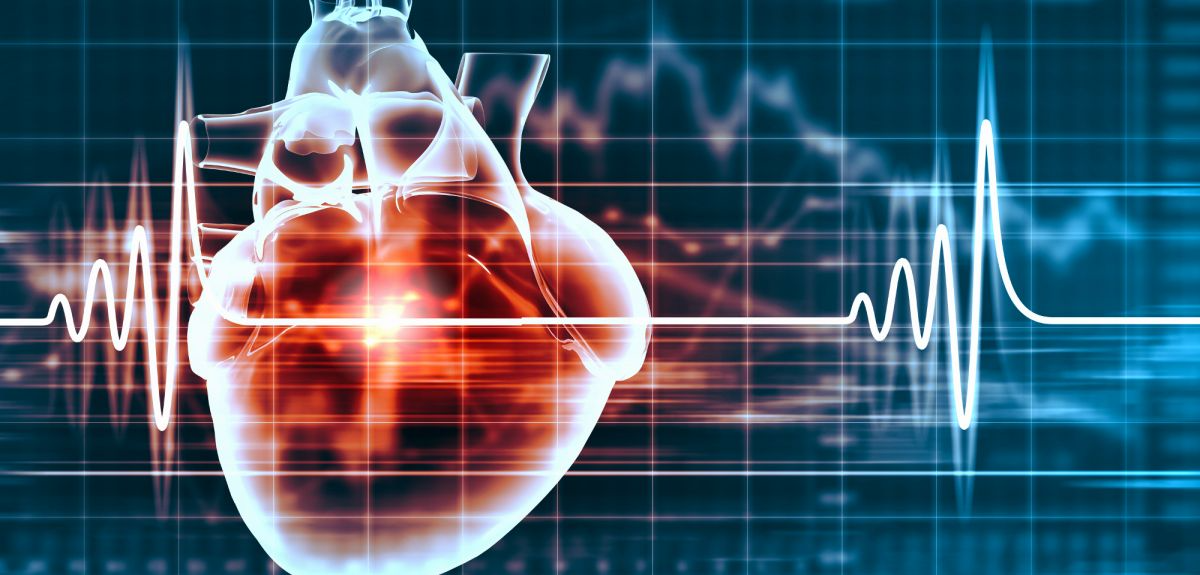

link : https://www.ox.ac.uk/news/2018-08-28-study-shows-new-technology-can-predict-fatal-heart-attacks




# Table of Contents
* [1. Problem statement](#Problem_statement)
    * [1.1. Data Dictionary](#Data_Dictionary)
    * [1.2. Objectives](#Obj)
    * [1.3. Hypothesis](#Approach)
    * [1.4. Approach](#Approach)
    
* [2. Data Cleaning and EDA](#Data_Cleaning_and_EDA)
   * [2.1. Import Libraries](#Lib)
   * [2.2. Load the data](#Loading)
   * [2.3. Missing Values](#NAN_values)
   * [2.4. Numerical Features](#NumF)
   * [2.5. Outliers](#Outliers)
   * [2.6. Correlation](#Correlation)
       
* [3. Modeling](#Modeling)
    * [3.1. Scaling features](#Scaling)
    * [3.2. Machine learning algorithm](#algorithm)
        * [3.2.1. K-neighbor](#KNN)
        * [3.2.2. Support vector machine](#SVM)
        * [3.2.3.  Logistic Regression](#LR)
        * [3.2.4. Decision tree](#tree)  
        * [3.2.5. Random forest](#RF)
        * [3.2.6. Convolutional Neural Network](#CNN)
    * [3.3. Final Model](#Fmodel)
      * [3.3.1. Comparing Models](#comparemodels)
      * [3.3.2. Optimum Model](#Optimum)
      * [3.3.3. Save Model](#save)
* [4. Questions](#Questions)
   

# 1. Problem statement<a class="anchor" id="Problem_statement"></a>


## 1.1. Data Dictionary<a class="anchor" id="Data_Dictionary"></a>

This datset is publicly available that includes certain patient attributes and medical data. Your task is to predict the likelihood of a patient getting a heart attack.

**Age** : Age of the patient

**Sex** : Sex of the patient

**cp** : Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

**trtbps**: Resting blood pressure (in mm Hg)

**chol** : Cholestoral in mg/dl fetched via BMI sensor
**caa**: Number of major vessels

**fbs** : (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

**restecg** : Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

**thalachh** : maximum heart rate achieved

**oldpeak** : Previous peak

**slp** : Slope

**caa**: Number of major vessels

**thall**: Thalium Stress Test result ~ (0,3)

**exng**: Exercise induced angina ~ 1 = Yes, 0 = No

**o2Saturation** : Blood oxygen saturation (%)

**output** : 0= less chance of heart attack 1= more chance of heart attack

## 1.2. Objectives<a class="anchor" id="Obj"></a>

Predict the likelihood of a patient getting a heart attack.



## 1.3. Hypothesis<a class="anchor" id="Approach"></a>

- These data were acquired from people under the same condition, fasted or no fasted, the same duration of time 
 
- Since some parameters like maximum heart rate depends to activity, I assume that data were acquired in both group after simialr excercise or activties. 

## 1.4. Approach<a class="anchor" id="Approach"></a>


- Data cleaning and EDA 
- Evaluating few supervised machine learning models
- Finding the optimum model for this project 
- Answer to Questions 


# 2. Data Cleaning and EDA <a class="anchor" id="Data_Cleaning_and_EDA)"></a>

## 2.1. Import Libraries<a class="anchor" id="Lib"></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler,OneHotEncoder
from itertools import product
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping
import plotly.express as px

import plotly.express as px

import pickle



## 2.2. Load the Data <a class="anchor" id="Loading"></a>

In [2]:
Data = pd.read_csv('Dataset_for_DS_Challenge.csv')

In [3]:
Data.head()

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  63.0  1.0  3.0   145.0  233.0  1.0      0.0     150.0   0.0      2.3  0.0   
1  37.0  1.0  2.0   130.0  250.0  0.0      1.0     187.0   0.0      3.5  0.0   
2  41.0  0.0  1.0   130.0  204.0  0.0      0.0     172.0   0.0      1.4  2.0   
3  56.0  1.0  1.0   120.0  236.0  0.0      1.0     178.0   0.0      0.8  2.0   
4  57.0  0.0  0.0   120.0  354.0  0.0      1.0     163.0   1.0      0.6  2.0   

   caa  thall  output  o2Saturation  
0  0.0    1.0     1.0          98.6  
1  0.0    2.0     1.0          98.6  
2  0.0    2.0     1.0          98.6  
3  0.0    2.0     1.0          98.6  
4  0.0    2.0     1.0          98.1

In [4]:
Data.shape

(3586, 15)

## 2.3. Missing Values <a class="anchor" id="NAN_values"></a>


In [5]:
Data.isna().sum()

age             3283
sex             3283
cp              3283
trtbps          3283
chol            3283
fbs             3283
restecg         3283
thalachh        3283
exng            3283
oldpeak         3283
slp             3283
caa             3283
thall           3283
output          3283
o2Saturation       0
dtype: int64

There is 3283 NAN values. Looking at the source of data, there is only value for o2Saturation for these observation which set to zero. Therefore, we remove all those 3283.  

In [6]:
Data = Data.dropna()

In [7]:
Data.shape

(303, 15)

There is 303 observation and 15 Features in the data set.

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    float64
 1   sex           303 non-null    float64
 2   cp            303 non-null    float64
 3   trtbps        303 non-null    float64
 4   chol          303 non-null    float64
 5   fbs           303 non-null    float64
 6   restecg       303 non-null    float64
 7   thalachh      303 non-null    float64
 8   exng          303 non-null    float64
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    float64
 11  caa           303 non-null    float64
 12  thall         303 non-null    float64
 13  output        303 non-null    float64
 14  o2Saturation  303 non-null    float64
dtypes: float64(15)
memory usage: 37.9 KB


## 2.4. Categorical Features <a class="anchor" id="CatF"></a>

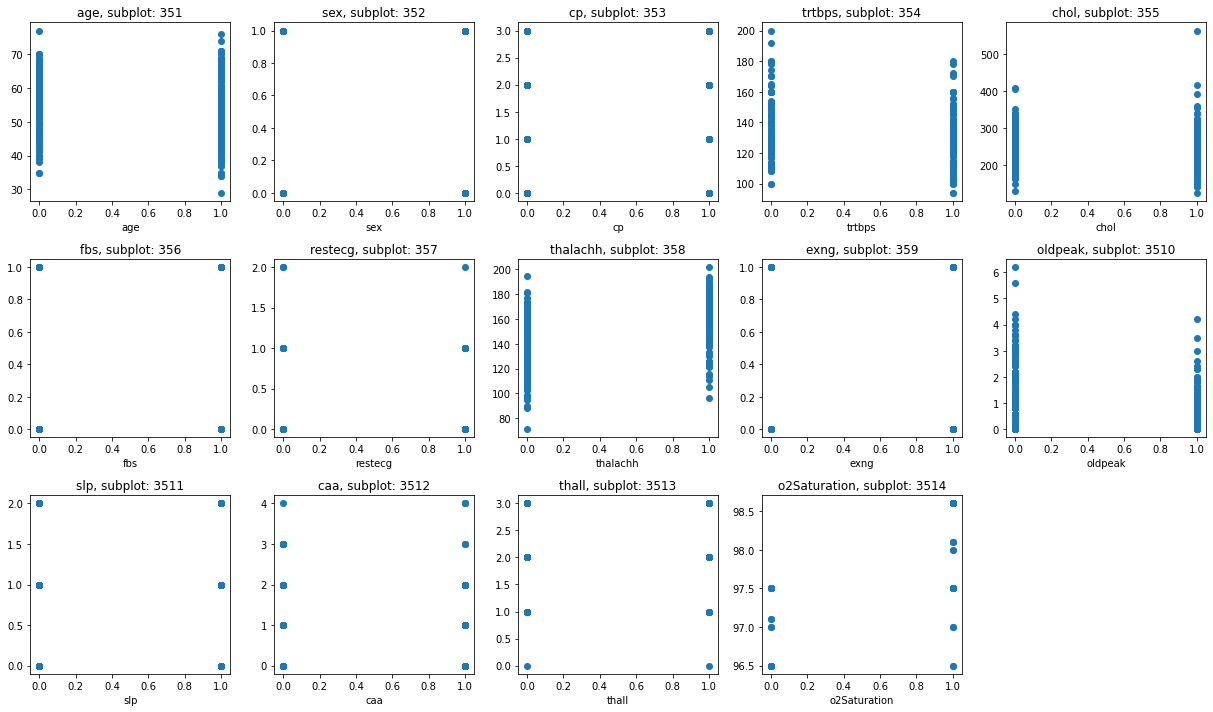

In [9]:
## Finding Categorical features by plot 

col= Data.columns.drop('output')

fig = plt.figure(figsize=(17,10))
c=1
for i in col:
    plt.subplot(3, 5, c)
    plt.scatter(Data['output'], Data[i])
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 5, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

In [10]:
group_features = [{'output':Data['output'].unique()},{'cp':Data['cp'].unique()},{'sex':Data['sex'].unique()} \
                  ,{'fbs':Data['fbs'].unique()},{'restecg':Data['restecg'].unique()},{'exng':Data['exng'].unique()}\
                 ,{'slp':Data['slp'].unique()},{'caa':Data['caa'].unique()}, {'thall':Data['thall'].unique()}]
                  

Looking at the scatter, there are 9 categorical features including output, sex, cp, fbs, restecg, exng, slp, caa, thall which have follwing values. 

In [11]:
for i in range(0,len(group_features)):
    print(group_features[i])

{'output': array([1., 0.])}
{'cp': array([3., 2., 1., 0.])}
{'sex': array([1., 0.])}
{'fbs': array([1., 0.])}
{'restecg': array([0., 1., 2.])}
{'exng': array([0., 1.])}
{'slp': array([0., 2., 1.])}
{'caa': array([0., 2., 1., 3., 4.])}
{'thall': array([1., 2., 3., 0.])}


**Distributions Of Feature Values**

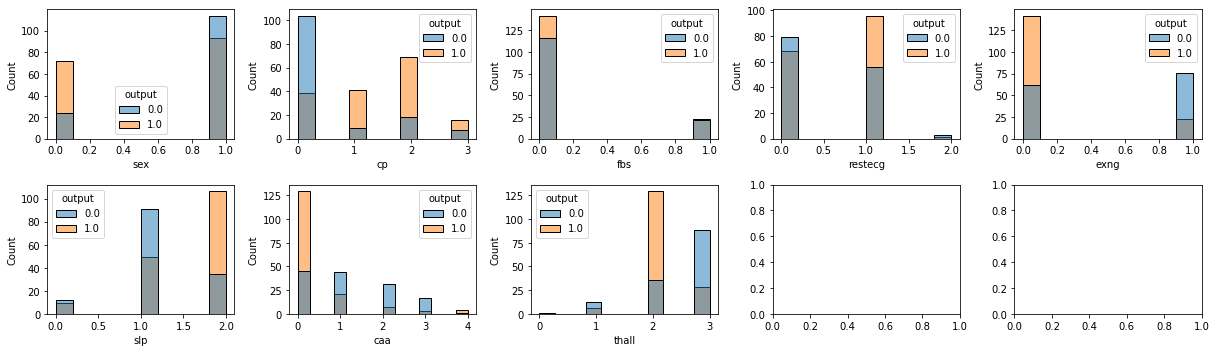

In [12]:
# looking at the histograom of categorical data to see if there is some akward category in categorical features. 


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(17,5))

names = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
# Iterating through axes and names
for name, ax in zip(names, axes.flatten()):
    sns.histplot(x=name,hue = 'output', data=Data, ax=ax)
fig.tight_layout()

There is no outliers can be seen in the histplot of data. Output =0,1 has observartions for all group in all categorical features.    

## 2.5. Numeric Features <a class="anchor" id="NumF"></a>

In [133]:
Data[["age","trtbps","chol","thalachh",'oldpeak','o2Saturation']].describe()

age      trtbps        chol    thalachh     oldpeak  \
count  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337  131.623762  246.264026  149.646865    1.039604   
std      9.082101   17.538143   51.830751   22.905161    1.161075   
min     29.000000   94.000000  126.000000   71.000000    0.000000   
25%     47.500000  120.000000  211.000000  133.500000    0.000000   
50%     55.000000  130.000000  240.000000  153.000000    0.800000   
75%     61.000000  140.000000  274.500000  166.000000    1.600000   
max     77.000000  200.000000  564.000000  202.000000    6.200000   

       o2Saturation  
count    303.000000  
mean      97.484488  
std        0.352649  
min       96.500000  
25%       97.500000  
50%       97.500000  
75%       97.500000  
max       98.600000

**Distributions Of Feature Values**

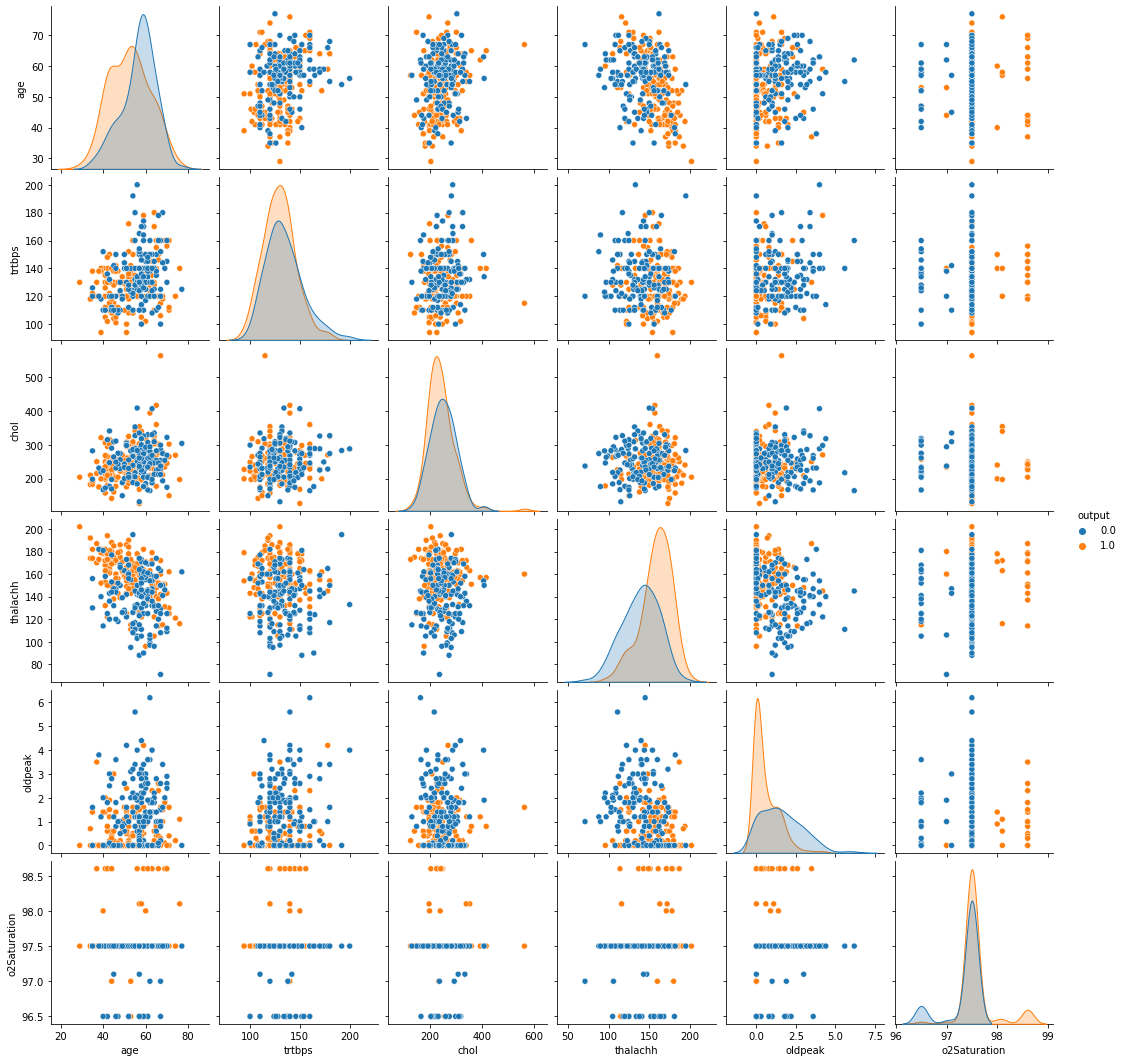

In [134]:
sns.pairplot(Data[["age","trtbps","chol","thalachh",'oldpeak','o2Saturation','output']],hue="output",diag_kind="kde")

## 2.6. Outliers <a class="anchor" id="Outliers"></a>



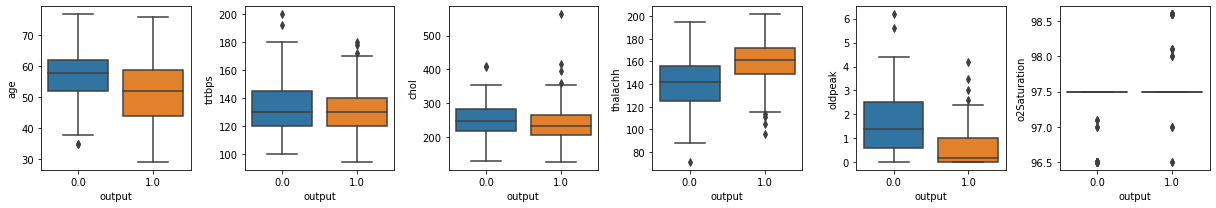

In [15]:
#Box plot of numerical features

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17,3))

names = ['age','trtbps','chol','thalachh','oldpeak','o2Saturation']
# Iterating through axes and names
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, x= "output", data=Data, orient='v', ax=ax)
plt.tight_layout()

There are outliers for all numerical features including age, trtbps, chol, thalachh and olepeak which was investiagted seperatelly in the follwing: 

#### Age Outlier

In [16]:
# The outlier for age is for age <38 in group of output =o
Data.loc[(Data['output']==0) & (Data['age'] <38) ]

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
227  35.0  1.0  0.0   120.0  198.0  0.0      1.0     130.0   1.0      1.6   
239  35.0  1.0  0.0   126.0  282.0  0.0      0.0     156.0   1.0      0.0   

     slp  caa  thall  output  o2Saturation  
227  1.0  0.0    3.0     0.0          97.5  
239  2.0  0.0    3.0     0.0          97.5

I keep these two outliers for age in group with output = 0, because there are people in this range of age in group output =1

#### trtbps Outlier

In [17]:
#The common outliers for both group are for trtbps >180.

Data.loc[(Data['trtbps'] >180)]

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
223  56.0  0.0  0.0   200.0  288.0  1.0      0.0     133.0   1.0      4.0   
248  54.0  1.0  1.0   192.0  283.0  0.0      0.0     195.0   0.0      0.0   

     slp  caa  thall  output  o2Saturation  
223  0.0  2.0    3.0     0.0          97.5  
248  2.0  1.0    3.0     0.0          97.5

There is life-threatening damage to the body's organs when Blood pressure is 180/120 mm Hg or greater.Since these observation are in the group with no heart attack,I removed these two observations.The outlier for group =1 is very close to quantile(75%) and so I keep them.  

In [18]:
Data_clean = Data[Data['trtbps'] < 180]

#### thalachh Outlier

In [19]:
#First look at the outlier for thalachh < 80
Data.loc[(Data['thalachh'] <80)]

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
272  67.0  1.0  0.0   120.0  237.0  0.0      1.0      71.0   0.0      1.0   

     slp  caa  thall  output  o2Saturation  
272  1.0  0.0    2.0     0.0          97.0

Maximum hear rate depends to age as well. So let's look at the maximum heart rate of people with similar age. 

In [20]:
Data.loc[(Data['output']==0) &(Data['age'] ==67)]['thalachh']

165    108.0
166    129.0
197    163.0
253    125.0
272     71.0
293    150.0
Name: thalachh, dtype: float64

Text(0, 0.5, 'thalachh')

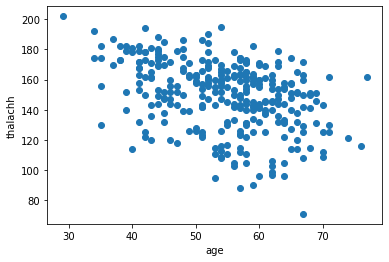

In [21]:
# look at the scatter plot of age and maximum heart range. 
plt.scatter(Data['age'], Data['thalachh'])
plt.xlabel('age')
plt.ylabel('thalachh')

The observation for thalachh = 71.0 is out of range considering other observation with similar age and also scatter plot of age&thalachh 

Since there is only one observation in output =0 that has outlier on thalachh, I remove this observation.The thalachh outlier for output=1 are in the range of thalachh with output = 0, so I prefer to keep them. 

In [22]:
Data_clean = Data_clean[Data_clean['thalachh'] > 71]

#### oldpeak Outlier 

In [23]:
# First look at the outlier of output = 0 which has oldpeak >5
Data.loc[(Data['oldpeak'] >5 )]

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
204  62.0  0.0  0.0   160.0  164.0  0.0      0.0     145.0   0.0      6.2   
221  55.0  1.0  0.0   140.0  217.0  0.0      1.0     111.0   1.0      5.6   

     slp  caa  thall  output  o2Saturation  
204  0.0  3.0    3.0     0.0          97.5  
221  0.0  0.0    3.0     0.0          97.5

Text(0.5, 1.0, 'oldpeak ratio between two groups')

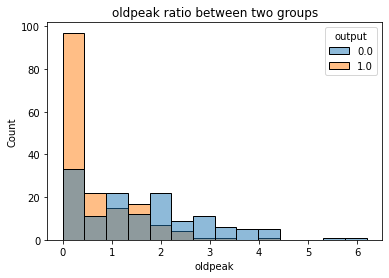

In [24]:
sns.histplot(Data,x="oldpeak",hue="output")
plt.title("oldpeak ratio between two groups")

These two old peak observation is far away from the other observation. I do not have information what is this old peak and how it can be related to others. There is no correlation between the old peak and other features. I decided to remove the outliers. I will keep the outlier for output =1 which is in the range of output = 0. 

In [25]:
Data_clean = Data_clean[Data_clean['oldpeak'] < 5]

#### chol Outlier

In [26]:
# First look at the outliers coomon for both group. 

Data.loc[(Data['chol']  > 380)]

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
28   65.0  0.0  2.0   140.0  417.0  1.0      0.0     157.0   0.0      0.8   
85   67.0  0.0  2.0   115.0  564.0  0.0      0.0     160.0   0.0      1.6   
96   62.0  0.0  0.0   140.0  394.0  0.0      0.0     157.0   0.0      1.2   
220  63.0  0.0  0.0   150.0  407.0  0.0      0.0     154.0   0.0      4.0   
246  56.0  0.0  0.0   134.0  409.0  0.0      0.0     150.0   1.0      1.9   

     slp  caa  thall  output  o2Saturation  
28   2.0  1.0    2.0     1.0          97.5  
85   1.0  0.0    3.0     1.0          97.5  
96   1.0  0.0    2.0     1.0          97.5  
220  1.0  3.0    3.0     0.0          97.5  
246  1.0  2.0    3.0     0.0          97.5

There are few observations in both group that are placed in outlier range of chol in boxplot. So let's look at the histogram of chol for these two groups.

Text(0.5, 1.0, 'chlostrol ratio between two groups')

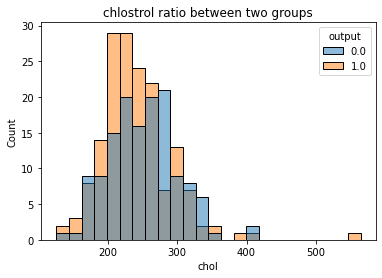

In [27]:
sns.histplot(Data,x="chol",hue="output")
plt.title("chlostrol ratio between two groups")

There are obsevration for 380<chol<430 in both group of output =0 and  output= 1 and they are not very far from the right tail of distribution. Therfore I decided to keep these observation and remove only cho > 450.  

In [28]:
Data.loc[(Data['chol']  > 450)]

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
85  67.0  0.0  2.0   115.0  564.0  0.0      0.0     160.0   0.0      1.6  1.0   

    caa  thall  output  o2Saturation  
85  0.0    3.0     1.0          97.5

In [29]:
Data_clean = Data_clean[Data_clean['chol'] < 450]

#### o2Saturation Outlier

<AxesSubplot:xlabel='o2Saturation', ylabel='Count'>

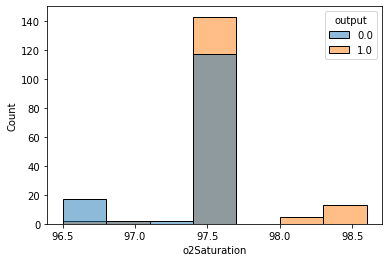

In [30]:
sns.histplot(data=Data, x="o2Saturation", hue="output", bins=7 )

In [31]:
pd.value_counts(Data.o2Saturation)

97.5    260
96.5     19
98.6     13
97.0      4
98.1      3
98.0      2
97.1      2
Name: o2Saturation, dtype: int64

The o2Saturation values mostly were measured as 97.5. The Boxplot shows all values except the 97.5 as outlier.  I would rather keep all of these in the data. Later I will look at the correlation and if it is correlated strongly to other variable, I might be able to find a way how I can handle these outier data. 

In [32]:
Data_clean.shape

(294, 15)

In [33]:
Data_clean[["age","trtbps","chol","thalachh",'oldpeak']].describe()

age      trtbps        chol    thalachh     oldpeak
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    54.166667  130.663265  244.690476  150.023810    0.991837
std      9.095405   16.104571   48.363274   22.412121    1.080229
min     29.000000   94.000000  126.000000   88.000000    0.000000
25%     47.000000  120.000000  211.000000  136.000000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.650000
75%     60.750000  140.000000  273.000000  166.750000    1.600000
max     77.000000  178.000000  417.000000  202.000000    4.400000

After cleaning the data, there are 296 observation for 15 features and the standard devation of numeric values seems reasonable. 

## 2.7. EDA <a class="anchor" id="EDA"></a>

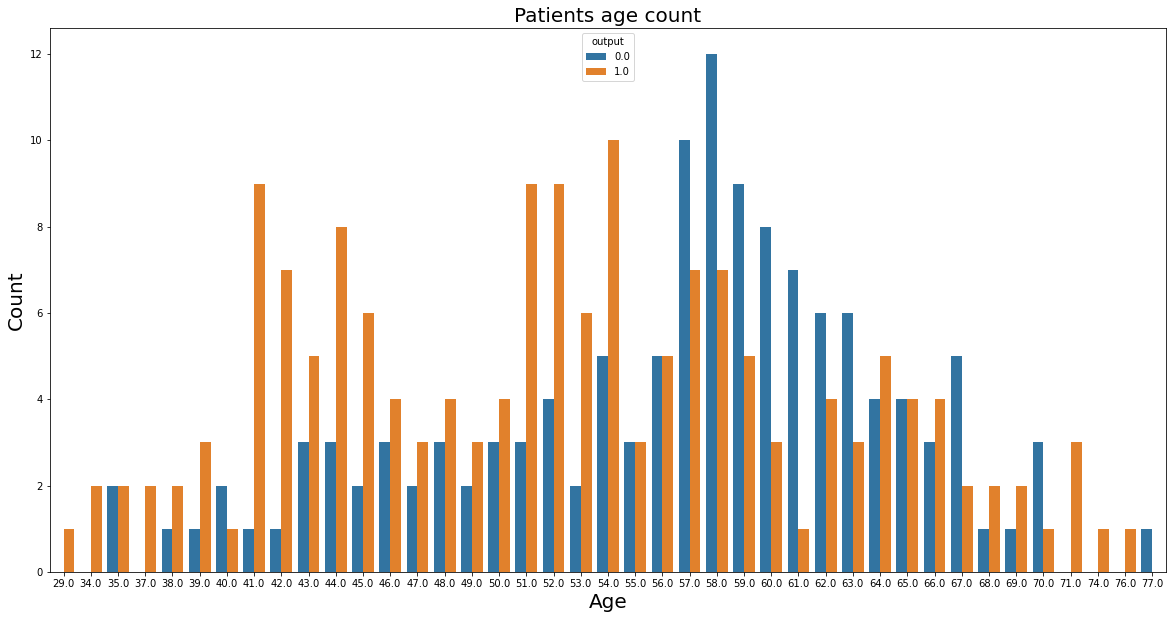

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(data =Data_clean, x='age',hue = 'output')
plt.title('Patients age count',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [35]:
s=Data_clean["sex"].value_counts().reset_index()
px.pie(s,names="index",values="sex",title='percentage of male & female patients')

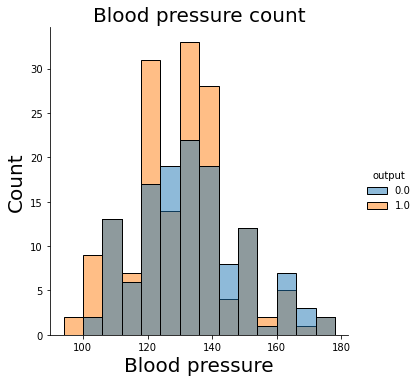

In [36]:
sns.displot(data = Data_clean, x= 'trtbps', hue ='output')
plt.title('Blood pressure count',fontsize=20)
plt.xlabel('Blood pressure',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

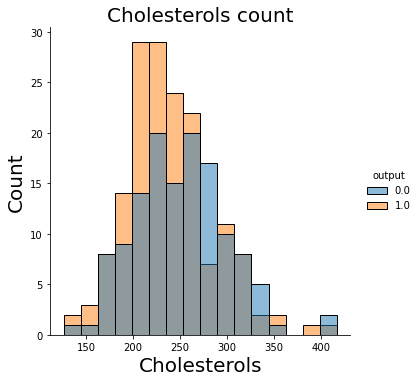

In [37]:
sns.displot(data = Data_clean, x='chol', hue = 'output')
plt.title('Cholesterols count',fontsize=20)
plt.xlabel('Cholesterols',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

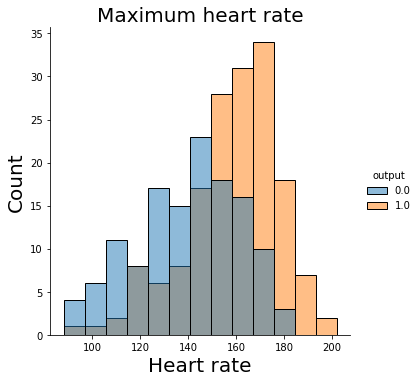

In [38]:
sns.displot(data = Data_clean, x = 'thalachh', hue = 'output')
plt.title('Maximum heart rate',fontsize=20)
plt.xlabel('Heart rate',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

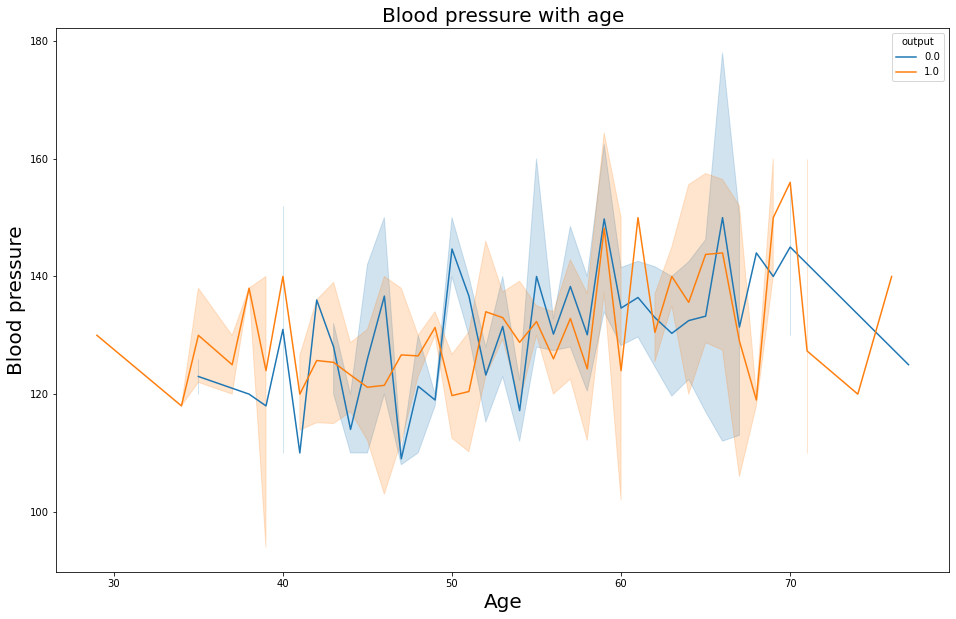

In [39]:
plt.figure(figsize=(16,10))
sns.lineplot(y="trtbps",x="age",data=Data_clean, hue ='output')
plt.title('Blood pressure with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Blood pressure',fontsize=20)
plt.show()

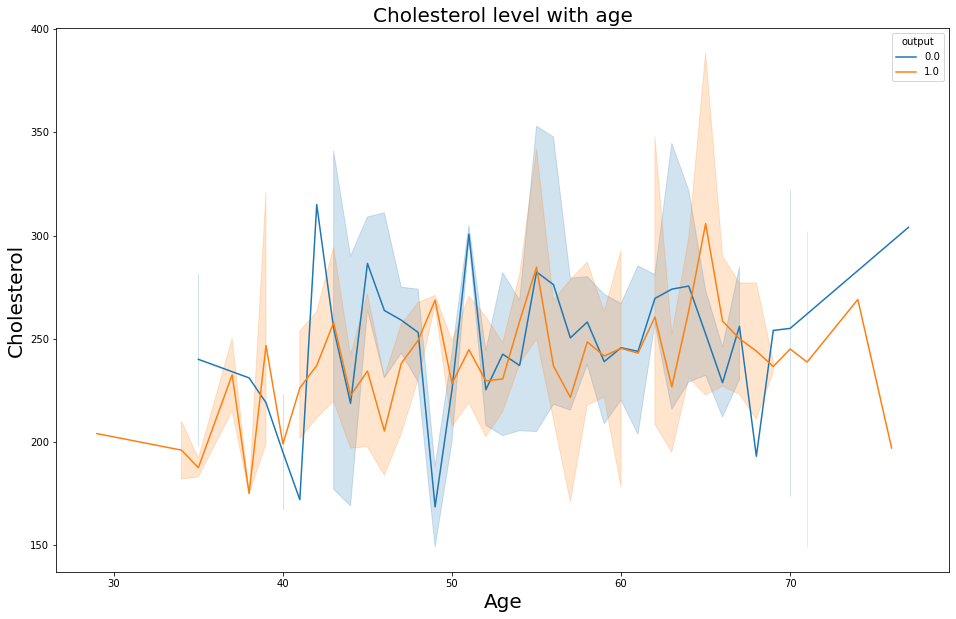

In [40]:
plt.figure(figsize=(16,10))
sns.lineplot(y='chol',x="age",data=Data_clean, hue ='output')
plt.title('Cholesterol level with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Cholesterol',fontsize=20)
plt.show()

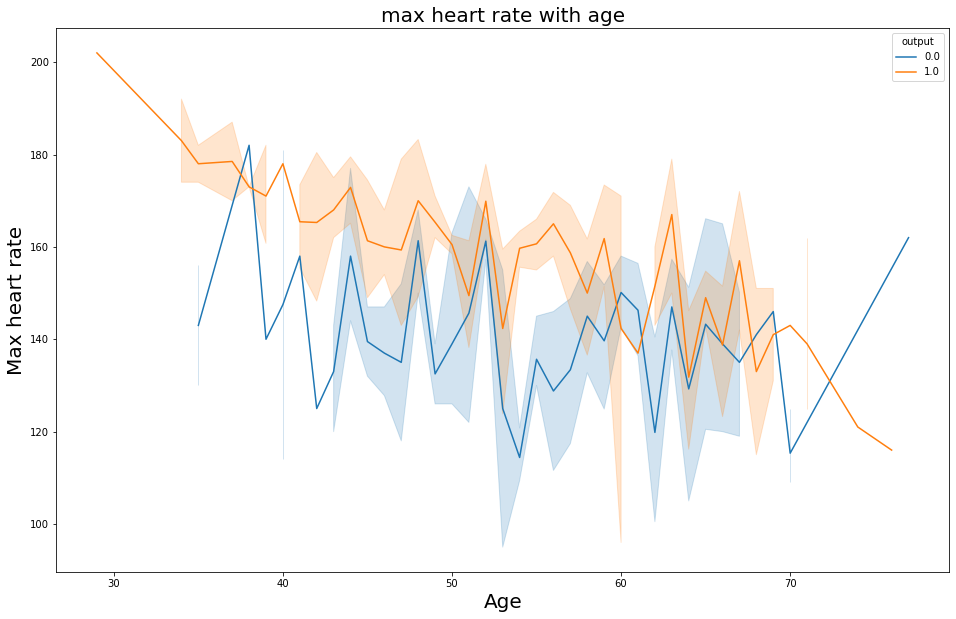

In [41]:
plt.figure(figsize=(16,10))
sns.lineplot(y='thalachh',x="age",data=Data_clean, hue ='output')
plt.title('max heart rate with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Max heart rate',fontsize=20)
plt.show()

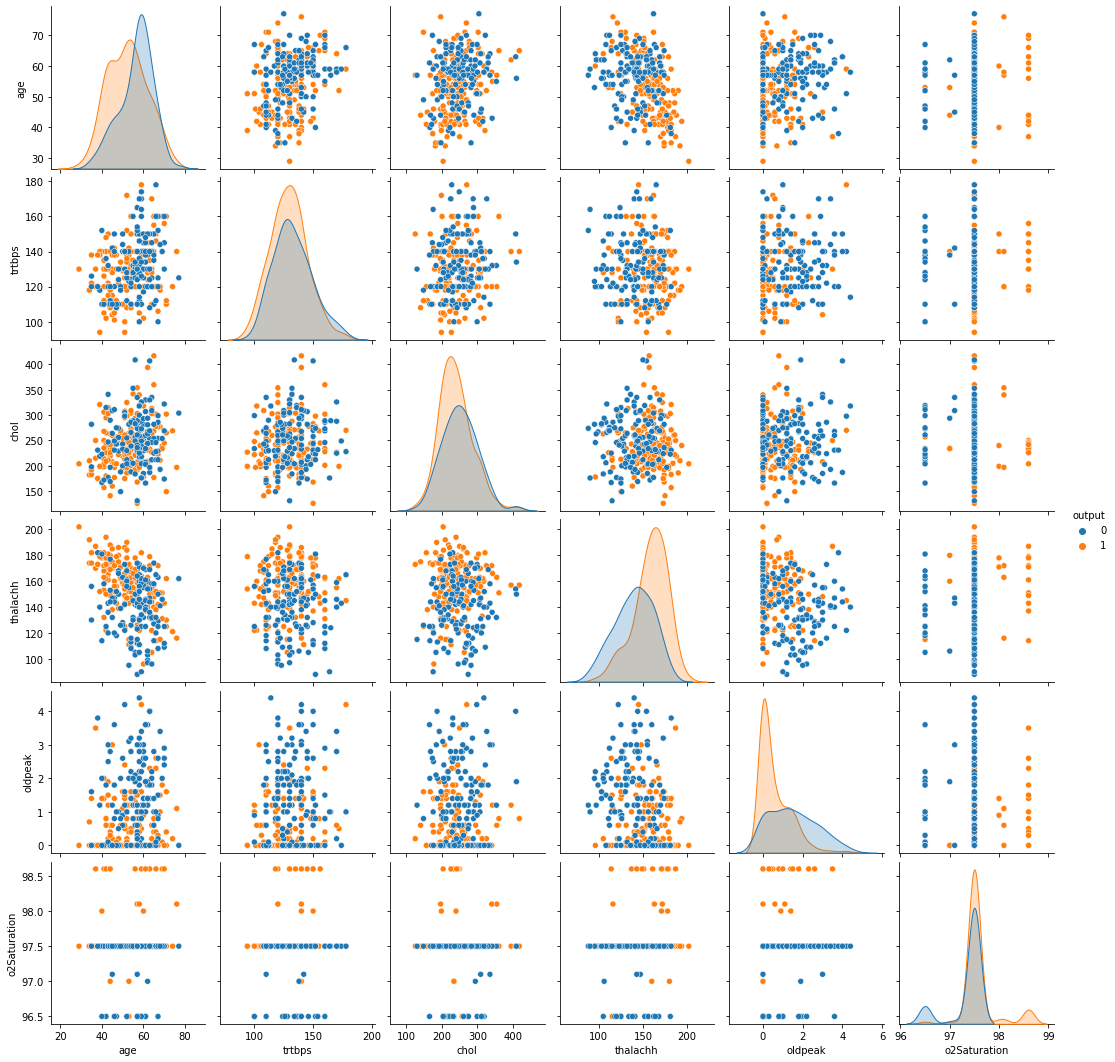

In [159]:
sns.pairplot(Data_clean[["age","trtbps","chol","thalachh",'oldpeak','o2Saturation','output']],hue="output",diag_kind="kde")

**Summary**

- Maximum age count of the heart patients is 58
- Percentage of male patients is 69% and female patients is 31%

- The highest count of maximum heart rate is between 140.0 and 150 for people with no heart attack and between 170 and 180 for people with heart attack

-  The highest count of cholesterol is between 220.0 and 270 for people with no heart attack and between 220 and 240 for people with heart attack. 

- The highest count of high blood pressure is between 20 and 140 for people with no heart attack and with heart attack

- Cholesterol and blood pressure increase with age, while maximum heart rate decrease with age in both group with heart attack and no heart attack

- From the pairplot, it is obvious that the distribution of oldpeak and thalachhare, and age are more differetn between two group output of 0 and 1.

- The oldpeak for output of 0 is broad while it is more narrow and more centred to the left side of plot(lower value of old peak). So there might a signifcant correlation between output and these two features. 

- The thalachh is shofted to the right for output = 1 and are more narrow. 

- The age distribution is more narrow also shifted to the right for output =0


## 2.7. Correlation <a class="anchor" id="Correlation"></a>

In [43]:
#Overal Correlation between continuous variable 
Data_clean[['age','chol','thalachh','oldpeak','o2Saturation','output']].corr()

age      chol  thalachh   oldpeak  o2Saturation    output
age           1.000000  0.200109 -0.403068  0.212869      0.003470 -0.224723
chol          0.200109  1.000000 -0.023958  0.073714     -0.027188 -0.114179
thalachh     -0.403068 -0.023958  1.000000 -0.336915      0.148147  0.421822
oldpeak       0.212869  0.073714 -0.336915  1.000000      0.030947 -0.425617
o2Saturation  0.003470 -0.027188  0.148147  0.030947      1.000000  0.315554
output       -0.224723 -0.114179  0.421822 -0.425617      0.315554  1.000000

There is no signifcant correlation between continuous variables in whole observation

In [44]:
# Correlation between continuous variable for individual groups (output = 0 and 1)
Data_clean_O0 = Data_clean[Data_clean['output']==0]
Data_clean_O1 = Data_clean[Data_clean['output']==1]
Data_clean_O0[['age','chol','thalachh','oldpeak','o2Saturation']].corr()

age      chol  thalachh   oldpeak  o2Saturation
age           1.000000  0.127741 -0.117362  0.106986      0.079122
chol          0.127741  1.000000  0.038676  0.035421      0.006764
thalachh     -0.117362  0.038676  1.000000 -0.200492     -0.011752
oldpeak       0.106986  0.035421 -0.200492  1.000000      0.133560
o2Saturation  0.079122  0.006764 -0.011752  0.133560      1.000000

In [45]:
Data_clean_O1[['age','chol','thalachh','oldpeak','o2Saturation']].corr()

age      chol  thalachh   oldpeak  o2Saturation
age           1.000000  0.219362 -0.531105  0.171123      0.081816
chol          0.219362  1.000000  0.015758  0.019450      0.011593
thalachh     -0.531105  0.015758  1.000000 -0.185044      0.043897
oldpeak       0.171123  0.019450 -0.185044  1.000000      0.273235
o2Saturation  0.081816  0.011593  0.043897  0.273235      1.000000

The correlation between age and thalachh changed significantly , changed from -0.1 to -0.5. However, still it is not a signifcant correlation. 

In [46]:
#Overall Correlation between categorical variables 

<AxesSubplot:xlabel='var2', ylabel='var1'>

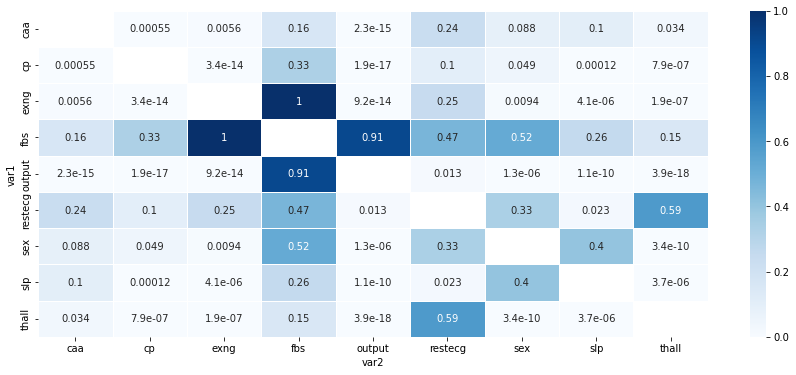

In [47]:
def coeff_cat(data,df1):
    """
    coeff_cat: Function for calcualting the correlation between ategorical group using Chi-square test 
    df1= categorical features
    input: Data in Dataframe format 
    output: The  p value of Chi-square test which shows signifcant correlation beyween features if p-value <0 
    """
    df2 =df1
    df_prod = list(product(df1,df1, repeat = 1))

    result = []
    for i in df_prod:
        if i[0] != i[1]:
            result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(data[i[0]], data[i[1]])))[1]))
    chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
    p_coeff= pd.pivot_table(chi_test_output, values='coeff', index='var1', columns='var2')

    return p_coeff

df1 =('sex','cp','fbs','restecg','exng','slp','caa','thall','output')
p_coeff = coeff_cat(Data_clean,df1)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(p_coeff, annot=True, linewidths=.5, ax=ax,cmap='Blues')

**Correlation of output and categorical features**
Based on the correlation coefficent between the categorical features, output has correlation with all categorical features except ftbs.  

**Thallium stress test (Thall) and heart attack**

Text(0.5, 1.0, 'thallium stress test ratio between two groups')

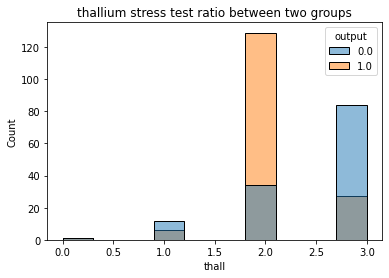

In [48]:
sns.histplot(Data_clean,x="thall",hue="output")
plt.title("thallium stress test ratio between two groups")

**Thall and heart attack risk**: A thallium stress test shows how well blood flows through your heart muscle while you're exercising or at rest. There is a strong coorelation between heart attack and thall(p-value = 2.2E-18). It is not clear the thall values are refered to which range of stress(no stress, Acute stress, Episodic acute stress, or Chronic stress).Heart attack was happened mostly to people with thall score of 2 compared with other group.

**slp and heart attack**
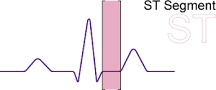

https://www.nottingham.ac.uk/nursing/practice/resources/cardiology/function/st_segment.php

slope : the ST/heart rate slope


Text(0.5, 1.0, 'slop ratio between two groups')

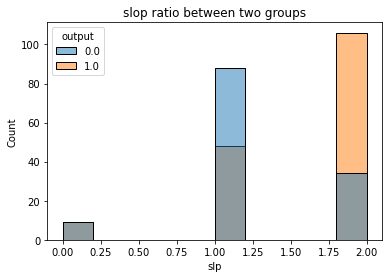

In [49]:
sns.histplot(Data_clean,x="slp",hue="output")
plt.title("slop ratio between two groups")

There is a strong correlation between slp and heart attack risk(p-value = 4.8 e-11).Heart attack was ahappened moslty to people with higher slope.

**Sex and heart attack**



Text(0.5, 1.0, 'sex ratio between two groups')

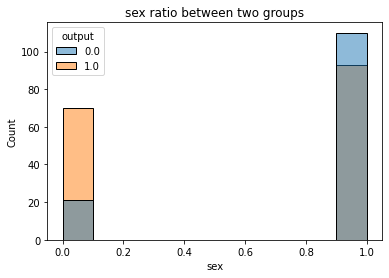

In [50]:
sns.histplot(Data_clean,x="sex",hue="output")
plt.title("sex ratio between two groups")

**Sex and heart attack:** The correlation between sex and heart attack risk is significant(p-value = 1.9 e-6) ,it seems that the heart attack risk is not equal between two gender women and men.In the data , it is not clear 0 and 1 refered to which gender. 

**Resting electrocardiographic results (restecg) and heart attack**

Text(0.5, 1.0, 'restecg ratio between two groups')

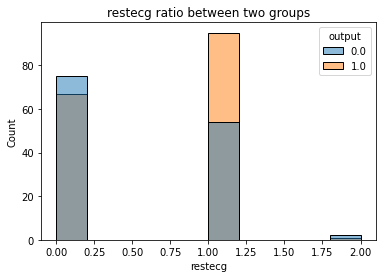

In [51]:
sns.histplot(Data_clean,x="restecg",hue="output")
plt.title("restecg ratio between two groups")

There is a significant correlation between restecg and heart attack risk (p-value = 0.0067). Heart attack happened to people with ST-T wave normality compared with Left ventricular hypertrophy and normal. 

**Exercise induced angina (exng) and heart attack**

Text(0.5, 1.0, 'exng ratio between two groups')

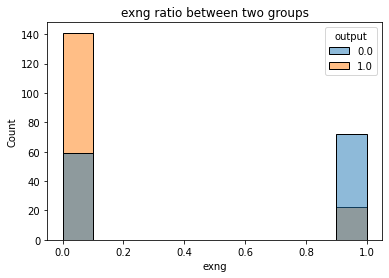

In [52]:
sns.histplot(Data_clean,x="exng",hue="output")
plt.title("exng ratio between two groups")

Exercise induced angina  is pain in the chest that comes on with exercise, stress, or other things that make the heart work harder. Theere is strong correlaton between exng and heart attack(p-value = 7.5 e-14). The ditsribution shows heart attack happened to people with no excercise induced angina. One reason can might be people with exng looks immediately for treatment and so it does not become severe to cause heart attack.  

**Chest pain(cp) and heart attack**

Text(0.5, 1.0, 'cp ratio between two groups')

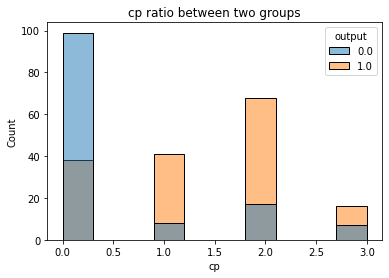

In [53]:
sns.histplot(Data_clean,x="cp",hue="output")
plt.title("cp ratio between two groups")

There is a strong correlation between the heart attack and chest pain (p-value =1.3 e-17).
Heart attack happen much less on people with Typical Angina(cp =0), while it happens often to people with Atypical Angina(cp=1), Non-anginal Pain(cp=2), and Asymptomatic(cp=3). The ratio of heart attack occurence is three time higher in people with Atypical Angina and  Non-anginal Pain and two times higher in people with Asymptomatic. 

**Number of major vessels(caa) and heart attack** 

Text(0.5, 1.0, 'Cholestoral')

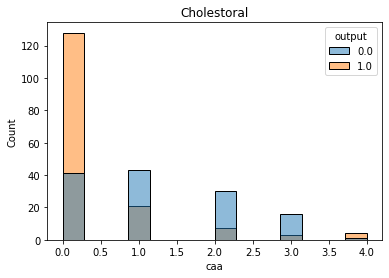

In [54]:
sns.histplot(Data_clean, x='caa',hue='output')
plt.title("Cholestoral")

There is strong correlation between the heart attack and Number of major vessels (p-value 2.7e-15). Heart attack happened often to people with no major vessels(acc = 0) and high number of major vessel(acc = 4), the ratio of heart attack/no heart attack is > 3 times. 

**Correlation between other features**

There is also significant correlation between other features:

    caa&cp, caa&exng, caa&thall
    cp&exng, cp&slp,cp&thall
    
    exng&slp, exng&thall
    
    restecg&slp
    
    sex&thall
    
    slp&thal

So it is better to look at correlation of categorical features for individual groups (output =0 ,1) to see if they were changed from one to other group 

<AxesSubplot:xlabel='var2', ylabel='var1'>

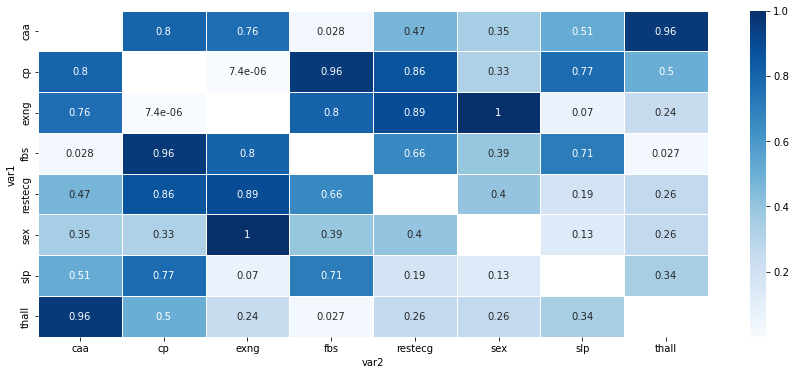

In [55]:
Data_clean_O0 = Data_clean[Data_clean['output']==0]
Data_clean_O1 = Data_clean[Data_clean['output']==1]

df1 =('sex','cp','fbs','restecg','exng','slp','caa','thall')
data_coeff_O0 = coeff_cat(Data_clean_O0,df1)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(data_coeff_O0, annot=True, linewidths=.5, ax=ax,cmap='Blues')

<AxesSubplot:xlabel='var2', ylabel='var1'>

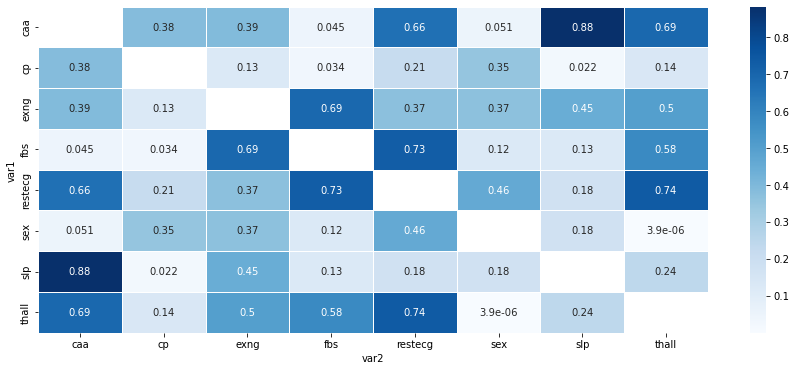

In [56]:
df1 =('sex','cp','fbs','restecg','exng','slp','caa','thall')
data_coeff_O1 = coeff_cat(Data_clean_O1,df1)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(data_coeff_O1, annot=True, linewidths=.5, ax=ax,cmap='Blues')

The correlation were changed between two groups. The differnce are as follow: 

- thall&fbs, exng&slp have significant correlation in group output = 0
- thall&sex , slp&cp, cp&fbs have significant correlation in group output = 1
- caa&fbs have significant correlation in both groups, however the p-value is more smaller in ouput = 0 

<AxesSubplot:xlabel='caa', ylabel='Count'>

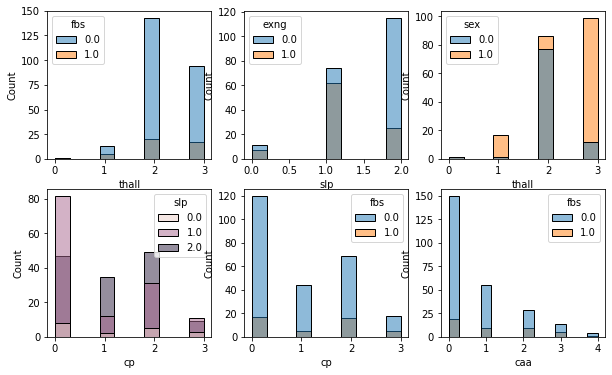

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))


sns.histplot(Data_clean, x='thall',hue='fbs',ax=ax[0,0])
sns.histplot(Data_clean, x='slp',hue='exng',ax=ax[0,1])
sns.histplot(Data_clean, x='thall',hue='sex',ax=ax[0,2])
sns.histplot(Data_clean, x='cp',hue='slp',ax=ax[1,0])
sns.histplot(Data_clean, x='cp',hue='fbs',ax=ax[1,1])
sns.histplot(Data_clean, x='caa',hue='fbs',ax=ax[1,2])

# 3. Modeling <a class="anchor" id="Modeling"></a>

In [58]:
Data_clean['output'] = Data_clean['output'].astype(int)

In [59]:
X_train,X_test,y_train,y_test= train_test_split(Data_clean.drop('output',axis=1),Data_clean['output'],test_size=0.2,random_state=101)

## 3.1. Scaling features <a class="anchor" id="Scaling"></a>

In [60]:
ohe = OneHotEncoder()
sc = StandardScaler()  

In [61]:
X_train.head(2)

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
56   48.0  1.0  0.0   122.0  222.0  0.0      0.0     186.0   0.0      0.0   
202  58.0  1.0  0.0   150.0  270.0  0.0      0.0     111.0   1.0      0.8   

     slp  caa  thall  o2Saturation  
56   2.0  0.0    2.0          97.5  
202  2.0  0.0    3.0          97.5

In [62]:
df1_train = X_train.iloc[:,[1,2,5,6,8,10,11,12]]
df2_train = X_train.iloc[:,[0,3,4,7,9,13]]
df1_test = X_test.iloc[:,[1,2,5,6,8,10,11,12]]
df2_test = X_test.iloc[:,[0,3,4,7,9,13]]

In [63]:
df1_train_sc = pd.DataFrame(ohe.fit_transform(df1_train).toarray())
df1_train_sc.columns = ohe.get_feature_names_out(df1_train.columns)
df1_test_sc = pd.DataFrame(ohe.transform(df1_test).toarray())
df1_test_sc.columns= ohe.get_feature_names_out(df1_test.columns)

In [64]:
df2_train_sc = pd.DataFrame(sc.fit_transform(df2_train))
df2_train_sc.columns = df2_train.columns
df2_test_sc = pd.DataFrame(sc.transform(df2_test))
df2_test_sc.columns= df2_test.columns


In [65]:
#Scale the numerical features 
df_test_sc = pd.DataFrame(np.hstack([df1_test,df2_test_sc]))
df_train_sc = pd.DataFrame(np.hstack([df1_train,df2_train_sc]))
df_train_sc.columns = X_train.columns
df_test_sc.columns = X_test.columns

In [66]:
#Scale the numerical features and onehot encoding categorical features. 
df_test_scho = pd.concat([df1_test_sc,df2_test_sc], axis =1)
df_train_scho = pd.concat([df1_train_sc,df2_train_sc],axis =1 )

## 3.2. Machine learning algorithm <a class="anchor" id="algorithm"></a>

### 3.2.1. K-neighbor<a class="anchor" id="KNN"></a>

In [67]:
#Define the KNN model
knc = KNeighborsClassifier(n_neighbors = 5)
#Fit the scaled train data
knc.fit(df_train_sc, y_train)
# Predict the scaled test data
y_pred_knc = knc.predict(df_test_sc)


In [68]:
# print the accuracy of prediction on train and test data 
print('The Training Accuracy is: ', knc.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', knc.score(df_test_sc,y_test))

The Training Accuracy is:  0.8851063829787233
The Validation Accuracy is:  0.7966101694915254


**Hyperparameters tuning**

In [69]:
# defining parameter range
param_grid = {'n_neighbors': [i for i in range(0,30)]} 
#creating grid search   
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3, cv = 5)
  
# fitting the model for grid search using the training sets with ross validation (cv =5)

grid.fit(df_train_sc, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 1/5] END .....................n_neighbors=1;, score=0.660 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.787 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.787 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.872 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.851 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.702 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2

[CV 2/5] END ....................n_neighbors=23;, score=0.745 total time=   0.0s
[CV 3/5] END ....................n_neighbors=23;, score=0.809 total time=   0.0s
[CV 4/5] END ....................n_neighbors=23;, score=0.936 total time=   0.0s
[CV 5/5] END ....................n_neighbors=23;, score=0.936 total time=   0.0s
[CV 1/5] END ....................n_neighbors=24;, score=0.638 total time=   0.0s
[CV 2/5] END ....................n_neighbors=24;, score=0.723 total time=   0.0s
[CV 3/5] END ....................n_neighbors=24;, score=0.766 total time=   0.0s
[CV 4/5] END ....................n_neighbors=24;, score=0.936 total time=   0.0s
[CV 5/5] END ....................n_neighbors=24;, score=0.936 total time=   0.0s
[CV 1/5] END ....................n_neighbors=25;, score=0.660 total time=   0.0s
[CV 2/5] END ....................n_neighbors=25;, score=0.723 total time=   0.0s
[CV 3/5] END ....................n_neighbors=25;, score=0.809 total time=   0.0s
[CV 4/5] END ...............

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 569, in _fit
  

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29]},
             verbose=3)

In [70]:
# print best parameter after tuning
print(grid.best_params_)

{'n_neighbors': 5}


In [71]:
# create Knc model with the optimum value for n_neighbors
knc = KNeighborsClassifier(n_neighbors = 5)
#fit the model using scaled train data 
knc.fit(df_train_sc, y_train)
# test the model on scaled test data 
y_pred_knc = knc.predict(df_test_sc)

#print the accuracy of prediction for test and train data 
print('The Training Accuracy is: ', knc.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', knc.score(df_test_sc,y_test))



The Training Accuracy is:  0.8851063829787233
The Validation Accuracy is:  0.7966101694915254


In [72]:
# create a dictionary for accuracy of train and test data for comparing all model together 
knc_summary = {'model': ['KNeighborsClassifier'],'train_accuracy': [knc.score(df_train_sc, y_train)]\
               ,'test_accuracy':[knc.score(df_test_sc,y_test)]}
Accuracy_allmode= pd.DataFrame.from_dict(knc_summary)

In [73]:
Accuracy_allmode.head()

model  train_accuracy  test_accuracy
0  KNeighborsClassifier        0.885106        0.79661

### 3.2.2. Support vector machine<a class="SVM" id="KNN"></a>

In [74]:
#Create a svm Classifier
clf = svm.SVC() # Linear Kernel



#Train the model using the scaled  train data
clf.fit(df_train_sc, y_train)

#Predict the response for the scaled test data
y_pred_clf = clf.predict(df_test_sc)


In [75]:
#print the accuracy for train and test data 
print('The Training Accuracy is: ', clf.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', clf.score(df_test_sc,y_test))

The Training Accuracy is:  0.8936170212765957
The Validation Accuracy is:  0.8813559322033898


**Hyperparameter Tuning**

In [76]:
  
# Defining parameters range for grid search 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
#creating the model for grid search  
grid = GridSearchCV(svm.SVC(kernel = 'linear'), param_grid, refit = True, verbose = 3, cv = 5)
  
# fitting the model for grid search
grid.fit(df_train_sc, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.723 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.851 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.851 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.936 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.936 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.723 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.851 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.851 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.936 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.936 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.723 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.787 total time=   0.4s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.872 total time=   0.5s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.915 total time=   0.5s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.957 total time=   2.4s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.723 total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.787 total time=   0.4s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.872 total time=   0.4s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.915 total time=   0.5s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.957 total time=   2.4s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.723 total time=   0.2s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.787 total time=   0.5s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.872 total time=   0.5s
[CV 4/5] END ...............

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [77]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1, 'gamma': 1}


In [78]:
#Create a svm Classifier based on best parameters found from grid search
clf = svm.SVC(kernel='linear', C = 0.1, gamma = 1) 

#Train the model using scaled training sets
clf.fit(df_train_sc, y_train)

#Predict the response for scaled test dataset
y_pred_clf = clf.predict(df_test_sc)

In [79]:
#print the accuracy for train and test data 
print('The Training Accuracy is: ', clf.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', clf.score(df_test_sc,y_test))

The Training Accuracy is:  0.8765957446808511
The Validation Accuracy is:  0.8813559322033898


In [80]:
# create a dictionary for accuracy of train and test data for comparing all model together 
svm_summary = {'model': ['svm'],'train_accuracy': [clf.score(df_train_sc, y_train)]\
               ,'test_accuracy':[clf.score(df_test_sc,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(svm_summary),Accuracy_allmode], axis =0)

In [81]:
Accuracy_allmode

model  train_accuracy  test_accuracy
0                   svm        0.876596       0.881356
0  KNeighborsClassifier        0.885106       0.796610

### 3.2.3. Logistic Regression<a class="SVM" id="LR"></a>

In [82]:
#create the model for LogisticRegression
lr = LogisticRegression()
# fit the data on scaled train data 
lr.fit(df_train_sc, y_train)
# fit the data on scaled test data 
y_pred_lr = lr.predict(df_test_sc)

In [83]:
print('The Training Accuracy is: ', lr.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', lr.score(df_test_sc,y_test))

The Training Accuracy is:  0.8723404255319149
The Validation Accuracy is:  0.8813559322033898


In [84]:
  
# defining parameter range for grid search
param_grid = {'C': [0.05,0.1,0.2, 0.5, 1], 
              'max_iter': [100, 200],
              'penalty': ['l1', 'l2', 'elasticnet']} 

# Define the model with grid search 
  
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3, cv = 5)
  
# fitting the model for grid search
grid.fit(df_train_sc, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.05, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.660 total time=   0.0s
[CV 2/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.809 total time=   0.0s
[CV 3/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.809 total time=   0.0s
[CV 4/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.957 total time=   0.0s
[CV 5/5] END ..C=0.05, max_iter=100, penalty=l2;, score=0.936 total time=   0.0s
[CV 1/5] END C=0.05, max_iter=100, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=0.05, max_iter=100, penalty=

[CV 2/5] END ...C=0.5, max_iter=200, penalty=l2;, score=0.787 total time=   0.0s
[CV 3/5] END ...C=0.5, max_iter=200, penalty=l2;, score=0.851 total time=   0.0s
[CV 4/5] END ...C=0.5, max_iter=200, penalty=l2;, score=0.915 total time=   0.0s
[CV 5/5] END ...C=0.5, max_iter=200, penalty=l2;, score=0.957 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=200, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END 

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/li

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 0.2, 0.5, 1], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [85]:
# print best parameter after tuning
print(grid.best_params_)  

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [86]:
# Define and fit, and pridct the logistic regression model for optimum parameters found from grid search
lr = LogisticRegression(C = 1, max_iter =100, penalty = 'l2')
lr.fit(df_train_sc, y_train)
y_pred_lr = lr.predict(df_test_sc)

In [87]:
#print the accuracy for train and test data 
print('The Training Accuracy is: ', lr.score(df_train_sc, y_train))
print('The Validation Accuracy is: ', lr.score(df_test_sc,y_test))

The Training Accuracy is:  0.8723404255319149
The Validation Accuracy is:  0.8813559322033898


In [88]:
# create a dictionary for accuracy of train and test data for comparing all model together 
lr_summary = {'model': ['LogisticRegression'],'train_accuracy': [lr.score(df_train_sc, y_train)]\
               ,'test_accuracy':[lr.score(df_test_sc,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(lr_summary),Accuracy_allmode], axis =0)

In [89]:
Accuracy_allmode

model  train_accuracy  test_accuracy
0    LogisticRegression        0.872340       0.881356
0                   svm        0.876596       0.881356
0  KNeighborsClassifier        0.885106       0.796610

### 3.2.4. Decision tree<a class="SVM" id="tree"></a>

In [90]:
#Define the Decision tree model 
Dtree = DecisionTreeClassifier(random_state=42)
#  Decision Tree Classifier using train data (noscaling and hotencoding are needed)
Dtree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_Dtree = Dtree.predict(X_test)

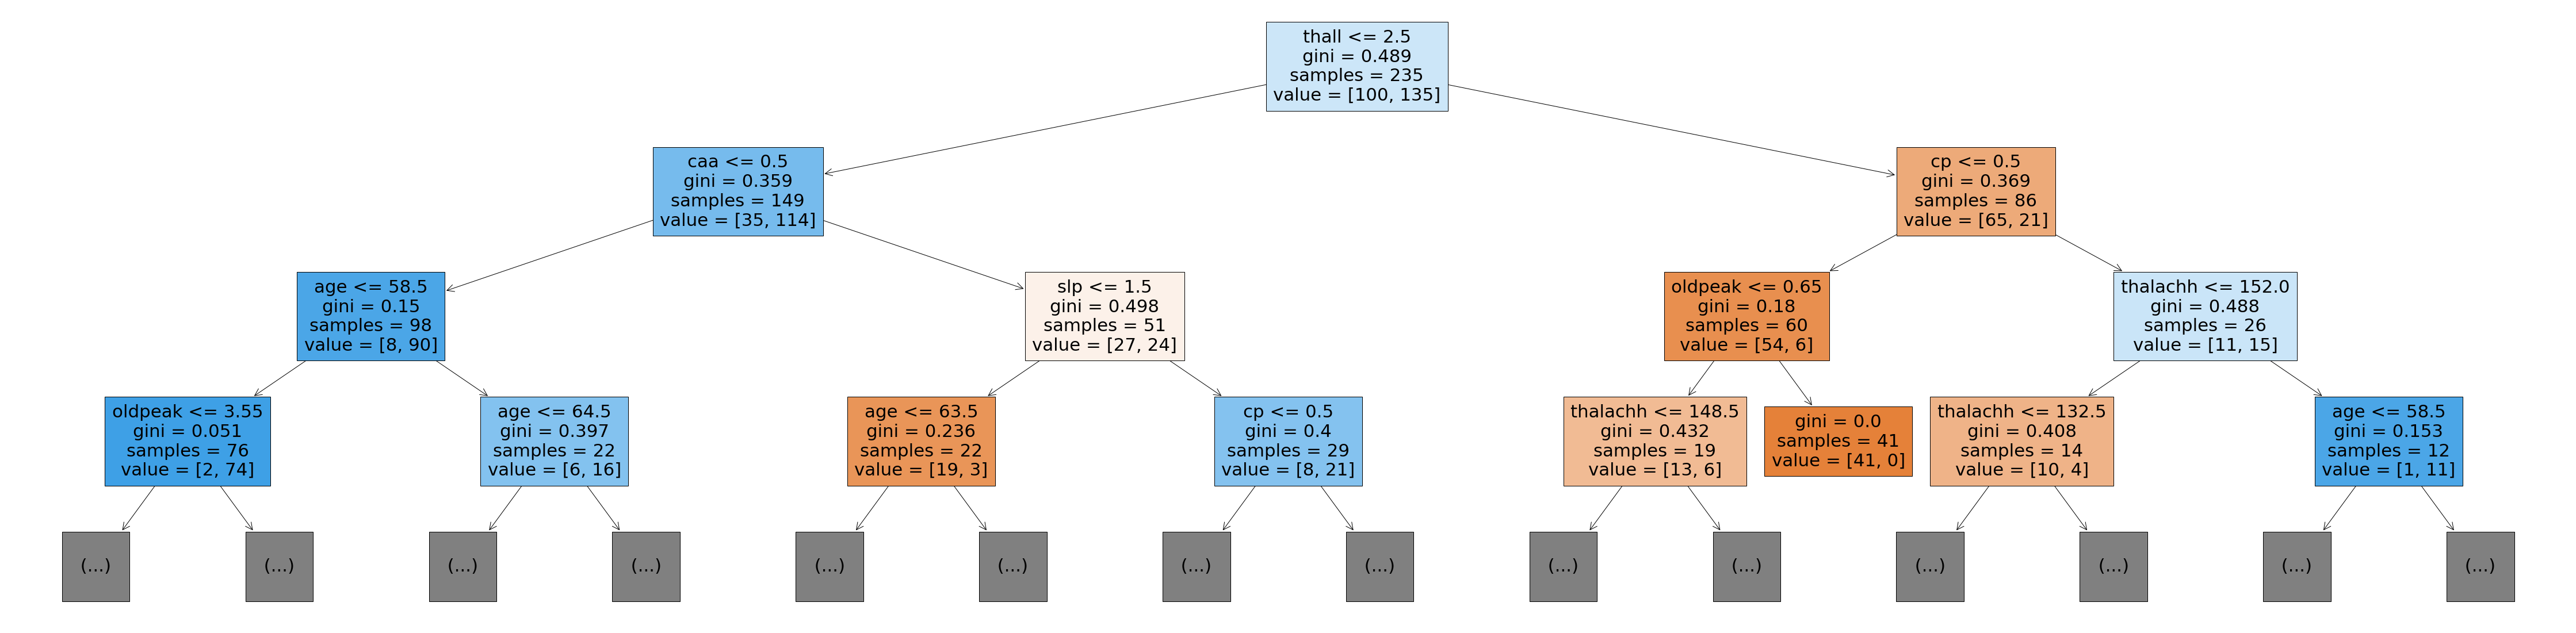

In [91]:
#plot the tree 
plt.figure(figsize =(80,20))

plot_tree(Dtree, feature_names=X_train.columns, max_depth=3, filled=True);

In [92]:
#print the accuracy for test and train data 
print('The Training Accuracy is: ', Dtree.score(X_train, y_train))
print('The Validation Accuracy is: ', Dtree.score(X_test,y_test))



The Training Accuracy is:  1.0
The Validation Accuracy is:  0.7288135593220338


**Hyperparameter tuning**

In [93]:
# defining parameters range for grid search 
param_grid = {'criterion': ['gini','entropy'], 
              'max_leaf_nodes': [5, 10, 20, 30],
              'max_depth': [i for i in range(1,15)]} 
 #define the model for grid search  
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, refit = True, verbose = 3, cv =5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.617 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.617 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10;, score=0.766 total time=   0.0s
[CV 1/5] END

[CV 1/5] END criterion=gini, max_depth=6, max_leaf_nodes=10;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_leaf_nodes=10;, score=0.787 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_leaf_nodes=10;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_leaf_nodes=10;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_leaf_nodes=10;, score=0.830 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.617 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.702 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.851 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_leaf_nodes=20;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_leaf_nodes=30;, score=0.

[CV 3/5] END criterion=gini, max_depth=12, max_leaf_nodes=5;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_leaf_nodes=5;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_leaf_nodes=5;, score=0.851 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_leaf_nodes=10;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_leaf_nodes=10;, score=0.787 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_leaf_nodes=10;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_leaf_nodes=10;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_leaf_nodes=10;, score=0.830 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_leaf_nodes=20;, score=0.617 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_leaf_nodes=20;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_leaf_nodes=20;, 

[CV 5/5] END criterion=entropy, max_depth=2, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_leaf_nodes=20;, score=0.702 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_leaf_nodes=20;, score=0.702 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_leaf_nodes=20;, score=0.702 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_leaf_nodes=20;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_leaf_nodes=20;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_leaf_nodes=30;, score=0.702 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_leaf_nodes=30;, score=0.702 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_leaf_nodes=30;, score=0.702 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_leaf_nodes=30;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_dept

[CV 5/5] END criterion=entropy, max_depth=7, max_leaf_nodes=30;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_leaf_nodes=5;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_leaf_nodes=5;, score=0.702 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_leaf_nodes=5;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_leaf_nodes=5;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_leaf_nodes=5;, score=0.851 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_leaf_nodes=10;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_leaf_nodes=10;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_leaf_nodes=10;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_leaf_nodes=10;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, 

[CV 1/5] END criterion=entropy, max_depth=12, max_leaf_nodes=10;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_leaf_nodes=10;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_leaf_nodes=10;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_leaf_nodes=10;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_leaf_nodes=10;, score=0.830 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_leaf_nodes=20;, score=0.702 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_leaf_nodes=20;, score=0.702 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_leaf_nodes=20;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_leaf_nodes=20;, score=0.915 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_leaf_nodes=20;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_leaf_nodes': [5, 10, 20, 30]},
             verbose=3)

In [94]:
# print best parameter after tuning
print(grid.best_params_)


{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 10}


In [95]:
#create the model with best parameters found from grid search CV 
Dtree = DecisionTreeClassifier(random_state=42,criterion = 'gini',max_depth=3, max_leaf_nodes =10)
# Train Decision Tree Classifier
Dtree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_Dtree = Dtree.predict(X_test)

In [96]:
print('The Training Accuracy for max_depth is: ', Dtree.score(X_train, y_train))
print('The Validation Accuracy for max_depth is:', Dtree.score(X_test,y_test))


The Training Accuracy for max_depth is:  0.8723404255319149
The Validation Accuracy for max_depth is: 0.711864406779661


In [97]:
# create a dictionary for accuracy of train and test data for comparing all model together 
Dtree_summary = {'model': ['DecisionTreeClassifier'],'train_accuracy': [Dtree.score(X_train, y_train)]\
               ,'test_accuracy':[Dtree.score(X_test,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(Dtree_summary),Accuracy_allmode], axis =0)

In [98]:
Accuracy_allmode

model  train_accuracy  test_accuracy
0  DecisionTreeClassifier        0.872340       0.711864
0      LogisticRegression        0.872340       0.881356
0                     svm        0.876596       0.881356
0    KNeighborsClassifier        0.885106       0.796610

### 3.2.5. Random forest<a class="RF" id="RF"></a>

In [99]:
#creating the Random forest
RF = RandomForestClassifier(random_state = 24, n_jobs = -1)
#fit the model on the train data (no scaling and hotencoding needed)
RF.fit(X_train, y_train)
#predict the model for test data 
y_pred_RF = RF.predict(X_test)

In [100]:
#print the accuracy of test and train data 
print('The Training Accuracy is: ', RF.score(X_train, y_train))
print('The Validation Accuracy is: ', RF.score(X_test,y_test))


The Training Accuracy is:  1.0
The Validation Accuracy is:  0.8305084745762712


In [101]:
# Define parameter range for grid search 
param_grid = {'n_estimators': [100,200,300], 
              'max_features': ['log2','sqrt','auto'],
              'min_samples_split': [2,4,6,8,10],
              'max_depth': [5,10,15]} 
# Define the  model for grid search
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, refit = True, verbose = 3,cv= 5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.723 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.766 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.851 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.979 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.894 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.723 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.723 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.851 total time=   0.3s
[CV 4/5] 

[CV 1/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.702 total time=   0.6s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.766 total time=   1.0s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.872 total time=   0.6s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=300;, score=0.915 total time=   0.9s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.723 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.766 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.851 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_split=2, n

[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.745 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.851 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.979 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.894 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=300;, score=0.702 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=300;, score=0.766 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=300;, score=0.872 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_split=1

[CV 4/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.979 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.894 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.723 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.745 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.851 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.979 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200;, score=0.894 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=300;, score=0.702 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_split=1

[CV 5/5] END max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.894 total time=   0.5s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.723 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.766 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.851 total time=   0.1s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.979 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.894 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=200;, score=0.723 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_split=10, n_estimators=200;, score=0.745 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=log2, min_samples

[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.894 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.723 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.723 total time=   0.4s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.851 total time=   0.5s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.979 total time=   0.4s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.894 total time=   0.5s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.723 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.766 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_spli

[CV 1/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.723 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.766 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.851 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.979 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.894 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.723 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.723 total time=   0.4s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.851 total time=   0.4s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_split=

[CV 2/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.745 total time=   0.2s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.830 total time=   0.2s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.979 total time=   0.2s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.894 total time=   0.2s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.723 total time=   0.3s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.766 total time=   0.3s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.851 total time=   0.3s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.979 total time=   0.3s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_split=

[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.723 total time=   0.5s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.851 total time=   0.5s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.979 total time=   0.5s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_split=6, n_estimators=300;, score=0.894 total time=   0.5s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.723 total time=   0.1s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.745 total time=   0.2s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.830 total time=   0.2s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.979 total time=   0.2s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_split=

[CV 2/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.723 total time=   0.3s
[CV 3/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.851 total time=   0.3s
[CV 4/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.979 total time=   0.3s
[CV 5/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=200;, score=0.894 total time=   0.3s
[CV 1/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=300;, score=0.723 total time=   0.4s
[CV 2/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=300;, score=0.723 total time=   0.5s
[CV 3/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=300;, score=0.851 total time=   0.5s
[CV 4/5] END max_depth=15, max_features=auto, min_samples_split=6, n_estimators=300;, score=0.979 total time=   0.5s
[CV 5/5] END max_depth=15, max_features=auto, min_samples_split=

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [102]:
# print best parameter after tuning
print(grid.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 100}


In [103]:
#Define the random forest model with best parameters found from grid search
RF = RandomForestClassifier(max_depth =5, max_features = 'log2', min_samples_split =4, n_estimators=100, random_state = 24, n_jobs = -1)
#fit the model on train data 
RF.fit(X_train, y_train)
#predict the model for test data 
y_pred_RF = RF.predict(X_test)

In [104]:
print('The Training Accuracy is: ', RF.score(X_train, y_train))
print('The Validation Accuracy is: ', RF.score(X_test,y_test))

The Training Accuracy is:  0.9574468085106383
The Validation Accuracy is:  0.8305084745762712


In [105]:
# create a dictionary for accuracy of train and test data for comparing all model together 
RF_summary = {'model': ['RandomForestClassifier'],'train_accuracy': [RF.score(X_train, y_train)]\
               ,'test_accuracy':[RF.score(X_test,y_test)]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(RF_summary),Accuracy_allmode], axis =0)

In [106]:
Accuracy_allmode

model  train_accuracy  test_accuracy
0  RandomForestClassifier        0.957447       0.830508
0  DecisionTreeClassifier        0.872340       0.711864
0      LogisticRegression        0.872340       0.881356
0                     svm        0.876596       0.881356
0    KNeighborsClassifier        0.885106       0.796610

### 3.2.6 Convolutional Neural Network<a class="NN" id="CNN"></a>

In [107]:
#Define cnn model using keras
def cnn_model():
    model = Sequential()
    model.add(Dense(512,activation='relu',input_shape=(31,)))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation = 'sigmoid'))
    return model
#create the cnn model 
model = cnn_model()
# compile model
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
#summary of model 
model.summary()

2022-11-21 11:52:05.823212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               16384     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [108]:
#Define the call back for EarlyStopping 
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

In [109]:
# It is recoemnded to do  hotencoding the categorical data and scaling numerical data for cnn model
# so I used the df_train_scho for train and df_test_scho for test data

#fit the data for a range of epoches and using the scaled and hotencoded train data. 
history = model.fit(df_train_scho,y_train,epochs=300,batch_size=10000,validation_split=0.10,callbacks=cb)

Epoch 1/300
1/1 [==============================] - 1s 865ms/step - loss: 0.7293 - accuracy: 0.4218 - val_loss: 0.6816 - val_accuracy: 0.7083
Epoch 2/300
1/1 [==============================] - 0s 41ms/step - loss: 0.7369 - accuracy: 0.4645 - val_loss: 0.6763 - val_accuracy: 0.7083
Epoch 3/300
1/1 [==============================] - 0s 59ms/step - loss: 0.7183 - accuracy: 0.4929 - val_loss: 0.6711 - val_accuracy: 0.7083
Epoch 4/300
1/1 [==============================] - 0s 62ms/step - loss: 0.7005 - accuracy: 0.5118 - val_loss: 0.6660 - val_accuracy: 0.7083
Epoch 5/300
1/1 [==============================] - 0s 54ms/step - loss: 0.7068 - accuracy: 0.4929 - val_loss: 0.6608 - val_accuracy: 0.7083
Epoch 6/300
1/1 [==============================] - 0s 86ms/step - loss: 0.6839 - accuracy: 0.5308 - val_loss: 0.6559 - val_accuracy: 0.7500
Epoch 7/300
1/1 [==============================] - 0s 54ms/step - loss: 0.6718 - accuracy: 0.5545 - val_loss: 0.6509 - val_accuracy: 0.7500
Epoch 8/300
1/1 [==

1/1 [==============================] - 0s 38ms/step - loss: 0.5198 - accuracy: 0.7820 - val_loss: 0.4399 - val_accuracy: 0.8750
Epoch 60/300
1/1 [==============================] - 0s 76ms/step - loss: 0.4990 - accuracy: 0.7915 - val_loss: 0.4363 - val_accuracy: 0.8750
Epoch 61/300
1/1 [==============================] - 0s 71ms/step - loss: 0.4834 - accuracy: 0.8104 - val_loss: 0.4326 - val_accuracy: 0.8750
Epoch 62/300
1/1 [==============================] - 0s 40ms/step - loss: 0.4924 - accuracy: 0.8009 - val_loss: 0.4290 - val_accuracy: 0.8750
Epoch 63/300
1/1 [==============================] - 0s 41ms/step - loss: 0.4820 - accuracy: 0.7867 - val_loss: 0.4255 - val_accuracy: 0.8750
Epoch 64/300
1/1 [==============================] - 0s 47ms/step - loss: 0.5041 - accuracy: 0.7915 - val_loss: 0.4221 - val_accuracy: 0.8750
Epoch 65/300
1/1 [==============================] - 0s 42ms/step - loss: 0.4907 - accuracy: 0.7867 - val_loss: 0.4187 - val_accuracy: 0.8750
Epoch 66/300
1/1 [========

1/1 [==============================] - 0s 73ms/step - loss: 0.3633 - accuracy: 0.8626 - val_loss: 0.3140 - val_accuracy: 0.8750
Epoch 118/300
1/1 [==============================] - 0s 74ms/step - loss: 0.4094 - accuracy: 0.8246 - val_loss: 0.3135 - val_accuracy: 0.8750
Epoch 119/300
1/1 [==============================] - 0s 57ms/step - loss: 0.3518 - accuracy: 0.8483 - val_loss: 0.3132 - val_accuracy: 0.8750
Epoch 120/300
1/1 [==============================] - 0s 78ms/step - loss: 0.3610 - accuracy: 0.8436 - val_loss: 0.3129 - val_accuracy: 0.8750
Epoch 121/300
1/1 [==============================] - 0s 50ms/step - loss: 0.3574 - accuracy: 0.8626 - val_loss: 0.3125 - val_accuracy: 0.8750
Epoch 122/300
1/1 [==============================] - 0s 47ms/step - loss: 0.3721 - accuracy: 0.8673 - val_loss: 0.3121 - val_accuracy: 0.8750
Epoch 123/300
1/1 [==============================] - 0s 77ms/step - loss: 0.3763 - accuracy: 0.8341 - val_loss: 0.3118 - val_accuracy: 0.8750
Epoch 124/300
1/1 [=

Epoch 175/300
1/1 [==============================] - 0s 49ms/step - loss: 0.3004 - accuracy: 0.8768 - val_loss: 0.2982 - val_accuracy: 0.8750
Epoch 176/300
1/1 [==============================] - 0s 68ms/step - loss: 0.2872 - accuracy: 0.9005 - val_loss: 0.2985 - val_accuracy: 0.8750
Epoch 177/300
1/1 [==============================] - 0s 47ms/step - loss: 0.3109 - accuracy: 0.8815 - val_loss: 0.2991 - val_accuracy: 0.8750
Epoch 178/300
1/1 [==============================] - 0s 54ms/step - loss: 0.2765 - accuracy: 0.8910 - val_loss: 0.2996 - val_accuracy: 0.8750
Epoch 179/300
1/1 [==============================] - 0s 53ms/step - loss: 0.3194 - accuracy: 0.8720 - val_loss: 0.3000 - val_accuracy: 0.8750
Epoch 180/300
1/1 [==============================] - 0s 47ms/step - loss: 0.2837 - accuracy: 0.8863 - val_loss: 0.3004 - val_accuracy: 0.8750
Epoch 181/300
1/1 [==============================] - 0s 43ms/step - loss: 0.3009 - accuracy: 0.8863 - val_loss: 0.3009 - val_accuracy: 0.8750
Epoch 

Epoch 233/300
1/1 [==============================] - 0s 41ms/step - loss: 0.2666 - accuracy: 0.8720 - val_loss: 0.3149 - val_accuracy: 0.8333
Epoch 234/300
1/1 [==============================] - 0s 58ms/step - loss: 0.2752 - accuracy: 0.8910 - val_loss: 0.3154 - val_accuracy: 0.8333
Epoch 235/300
1/1 [==============================] - 0s 41ms/step - loss: 0.2582 - accuracy: 0.8863 - val_loss: 0.3160 - val_accuracy: 0.8333
Epoch 236/300
1/1 [==============================] - 0s 52ms/step - loss: 0.2641 - accuracy: 0.9100 - val_loss: 0.3166 - val_accuracy: 0.8333
Epoch 237/300
1/1 [==============================] - 0s 58ms/step - loss: 0.2260 - accuracy: 0.9100 - val_loss: 0.3171 - val_accuracy: 0.8333
Epoch 238/300
1/1 [==============================] - 0s 58ms/step - loss: 0.2453 - accuracy: 0.8957 - val_loss: 0.3178 - val_accuracy: 0.8333
Epoch 239/300
1/1 [==============================] - 0s 60ms/step - loss: 0.2731 - accuracy: 0.9052 - val_loss: 0.3182 - val_accuracy: 0.8333
Epoch 

Epoch 291/300
1/1 [==============================] - 0s 48ms/step - loss: 0.2096 - accuracy: 0.9242 - val_loss: 0.3299 - val_accuracy: 0.8333
Epoch 292/300
1/1 [==============================] - 0s 55ms/step - loss: 0.2247 - accuracy: 0.9242 - val_loss: 0.3302 - val_accuracy: 0.8333
Epoch 293/300
1/1 [==============================] - 0s 75ms/step - loss: 0.2028 - accuracy: 0.9100 - val_loss: 0.3307 - val_accuracy: 0.8333
Epoch 294/300
1/1 [==============================] - 0s 47ms/step - loss: 0.2284 - accuracy: 0.8910 - val_loss: 0.3314 - val_accuracy: 0.8333
Epoch 295/300
1/1 [==============================] - 0s 48ms/step - loss: 0.2172 - accuracy: 0.9147 - val_loss: 0.3322 - val_accuracy: 0.8333
Epoch 296/300
1/1 [==============================] - 0s 49ms/step - loss: 0.1999 - accuracy: 0.9147 - val_loss: 0.3332 - val_accuracy: 0.8333
Epoch 297/300
1/1 [==============================] - 0s 54ms/step - loss: 0.2326 - accuracy: 0.9194 - val_loss: 0.3343 - val_accuracy: 0.8333
Epoch 

Train: 0.919, Test: 0.915


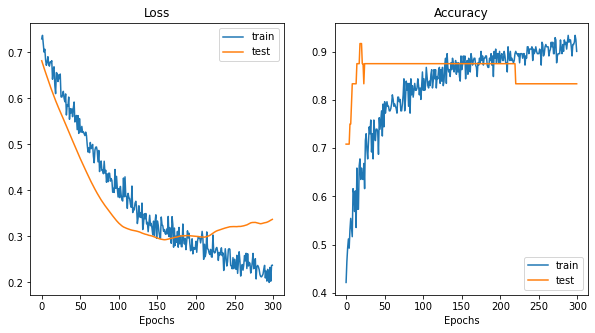

<Figure size 432x288 with 0 Axes>

In [110]:
# evaluate the model based on accuracy and loss 
_, train_acc = model.evaluate(df_train_scho, y_train, verbose=0)
_, test_acc = model.evaluate(df_test_scho, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.legend()
# plot accuracy during training
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.legend()
plt.show()
plt.tight_layout()

The optimum number of epoches is when we have minimum loss and maximum accuracy for test data which is around 140. 

In [111]:
# compile cnn model
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
#fit the model for the best epochs = 140 
history = model.fit(df_train_scho,y_train,epochs=140,batch_size=10000,validation_split=0.10)

Epoch 1/140
1/1 [==============================] - 1s 775ms/step - loss: 0.2507 - accuracy: 0.9052 - val_loss: 0.3403 - val_accuracy: 0.8333
Epoch 2/140
1/1 [==============================] - 0s 42ms/step - loss: 0.2213 - accuracy: 0.8863 - val_loss: 0.3422 - val_accuracy: 0.8333
Epoch 3/140
1/1 [==============================] - 0s 54ms/step - loss: 0.2105 - accuracy: 0.9194 - val_loss: 0.3428 - val_accuracy: 0.8333
Epoch 4/140
1/1 [==============================] - 0s 61ms/step - loss: 0.2160 - accuracy: 0.9336 - val_loss: 0.3429 - val_accuracy: 0.8333
Epoch 5/140
1/1 [==============================] - 0s 47ms/step - loss: 0.2110 - accuracy: 0.9242 - val_loss: 0.3432 - val_accuracy: 0.8333
Epoch 6/140
1/1 [==============================] - 0s 52ms/step - loss: 0.2313 - accuracy: 0.8910 - val_loss: 0.3432 - val_accuracy: 0.8333
Epoch 7/140
1/1 [==============================] - 0s 56ms/step - loss: 0.1978 - accuracy: 0.9336 - val_loss: 0.3437 - val_accuracy: 0.8333
Epoch 8/140
1/1 [==

1/1 [==============================] - 0s 49ms/step - loss: 0.2349 - accuracy: 0.9100 - val_loss: 0.3610 - val_accuracy: 0.7917
Epoch 60/140
1/1 [==============================] - 0s 48ms/step - loss: 0.1928 - accuracy: 0.9384 - val_loss: 0.3608 - val_accuracy: 0.7917
Epoch 61/140
1/1 [==============================] - 0s 45ms/step - loss: 0.1732 - accuracy: 0.9336 - val_loss: 0.3602 - val_accuracy: 0.7917
Epoch 62/140
1/1 [==============================] - 0s 62ms/step - loss: 0.1856 - accuracy: 0.9336 - val_loss: 0.3595 - val_accuracy: 0.7917
Epoch 63/140
1/1 [==============================] - 0s 58ms/step - loss: 0.1901 - accuracy: 0.9147 - val_loss: 0.3587 - val_accuracy: 0.7917
Epoch 64/140
1/1 [==============================] - 0s 76ms/step - loss: 0.1679 - accuracy: 0.9384 - val_loss: 0.3582 - val_accuracy: 0.7917
Epoch 65/140
1/1 [==============================] - 0s 50ms/step - loss: 0.1841 - accuracy: 0.9242 - val_loss: 0.3567 - val_accuracy: 0.7917
Epoch 66/140
1/1 [========

1/1 [==============================] - 0s 35ms/step - loss: 0.1492 - accuracy: 0.9289 - val_loss: 0.3677 - val_accuracy: 0.7917
Epoch 118/140
1/1 [==============================] - 0s 42ms/step - loss: 0.1727 - accuracy: 0.9479 - val_loss: 0.3691 - val_accuracy: 0.7917
Epoch 119/140
1/1 [==============================] - 0s 37ms/step - loss: 0.1732 - accuracy: 0.9384 - val_loss: 0.3701 - val_accuracy: 0.7917
Epoch 120/140
1/1 [==============================] - 0s 62ms/step - loss: 0.1731 - accuracy: 0.9336 - val_loss: 0.3707 - val_accuracy: 0.7917
Epoch 121/140
1/1 [==============================] - 0s 48ms/step - loss: 0.1823 - accuracy: 0.9242 - val_loss: 0.3709 - val_accuracy: 0.7917
Epoch 122/140
1/1 [==============================] - 0s 43ms/step - loss: 0.2064 - accuracy: 0.9052 - val_loss: 0.3710 - val_accuracy: 0.7917
Epoch 123/140
1/1 [==============================] - 0s 64ms/step - loss: 0.1695 - accuracy: 0.9336 - val_loss: 0.3709 - val_accuracy: 0.7917
Epoch 124/140
1/1 [=

In [112]:
scores_tr = model.evaluate(df_train_scho, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores_tr[1]*100))

accuracy: 95.32%


In [113]:
scores_te = model.evaluate(df_test_scho, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores_te[1]*100))

accuracy: 91.53%


In [114]:
# create a dictionary for accuracy of train and test data for comparing all model together 
cnn_summary = {'model': ['CNN'],'train_accuracy': [scores_tr[1]]\
               ,'test_accuracy':[scores_te[1]]}
Accuracy_allmode= pd.concat([pd.DataFrame.from_dict(cnn_summary),Accuracy_allmode], axis =0)

In [115]:
Accuracy_allmode = Accuracy_allmode.reset_index()

In [116]:
Accuracy_allmode.drop('index', inplace=True, axis=1)


## 3.3. Final Model<a class="NN" id="Fmodel"></a>


### 3.3.1. Comparing models <a class="NN" id="comparemodels"></a>


In [117]:
# Comparing accuracy of models 

In [118]:
Accuracy_allmode.head()

model  train_accuracy  test_accuracy
0                     CNN        0.953192       0.915254
1  RandomForestClassifier        0.957447       0.830508
2  DecisionTreeClassifier        0.872340       0.711864
3      LogisticRegression        0.872340       0.881356
4                     svm        0.876596       0.881356

- **Convolutional neural network(CNN)**: CNN has the highest train and test accuracy, but its test accuracy is lower. So the CNN suffers from overfitting. CNN also like black box and important of features is not possible. 

- **RandomForestClassifier** : RandomForestClassifier has the highest train accuracy, but it test accuracy is lower. It strongly suffers from overfitting. RandomForestClassifier also like black box and important of features is not possible. 


- **DecisionTreeClassifier**:  It has lower test accuracy score compared with other models. Also it suffer from overfitting(lower test accuracy compared with train accuracy). The model is like black box and difficult to interpret the output.

- **LogisticRegression** : It has lower test accuracy compared with CNN, but does not suffer from overfitting. Interpretating the importance of features in the model is also possible. 


- **Super vector machine(svm)** has same test accuracy as LogisticRegression and does not suffer from overfitting. Interpretating the importance of features in the model is also possible. 

Since the test accuracy of **LogisticRegression** and **svm** are similar and interpreation of results(importance of features)is possible for both models, is  it is better to look at other metrics for these two model. 

In this project, the aim is to predict the heart attack.Therefore, It is important to predict the heart attack in order to look for treatment and safe their live. So, the model which predicts less false negative is more suitable. Predicting less false negative results in high **Recall**. 

**Recall** is defined as True positive / (True positive + False Negative). False negative is the number of people with heart attck predicted as no heart attack and True positive is the number of people with heart attck predicted as with heart attack.



**Super Vector Machine(svm)**

In [119]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        31
           1       0.80      1.00      0.89        28

    accuracy                           0.88        59
   macro avg       0.90      0.89      0.88        59
weighted avg       0.91      0.88      0.88        59



**Logistic Regression**

In [120]:
# Define and fit, and pridct the logistic regression model for optimum parameters found from grid search
lr = LogisticRegression(C = 1, max_iter =100, penalty = 'l2')
#Train the model using the scaled training sets
lr.fit(df_train_sc, y_train)

#Predict the response for the scaled test dataset
y_pred = lr.predict(df_test_sc)

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.82      0.96      0.89        28

    accuracy                           0.88        59
   macro avg       0.89      0.89      0.88        59
weighted avg       0.89      0.88      0.88        59



The SVM has higher recall compared with logistic regression, 1 versus 0.96. 

### 3.3.2 Optimum Model<a class="NN" id="Optimum"></a>

**My optimum model will be Super Vector Machine(svm)** 

- The recall for output = 1 in svm is 1, which means it does not have false negative. All patient with heart attack was predicted by the model.

- Interpretating the importance of features in the model is also possible.

- The SVM is deterministic  while logistic regression is probabilistic. 

- For the kernel space, SVM is faster.

- It can handle better the outliers

In [121]:
# get importance of features
importance_df = pd.DataFrame({'Importance of features': abs(clf.coef_[0])}, index = X_train.columns)
importance_df.sort_values('Importance of features', ascending = False).head(10)

Importance of features
o2Saturation                0.567743
age                         0.562246
chol                        0.506440
thalachh                    0.505255
sex                         0.470905
restecg                     0.451355
fbs                         0.381039
thall                       0.314801
caa                         0.284695
oldpeak                     0.176244

So the importance of features in predicting the probabilites of heart attack is shown in the plot 

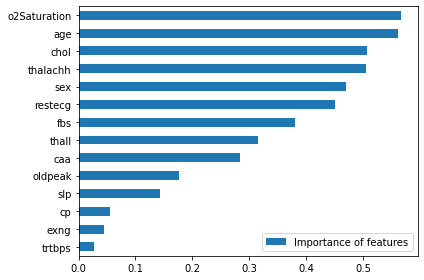

In [122]:
# plot the importance of features
importance_df.sort_values('Importance of features', ascending = True).plot.barh()
plt.tight_layout()
plt.show()

In EDA, the distribution of data for continuous features was differetn between two group, especially for o2Saturation that  distribution was shofted to the right, more o2Saturation values, for people with heart attack. 

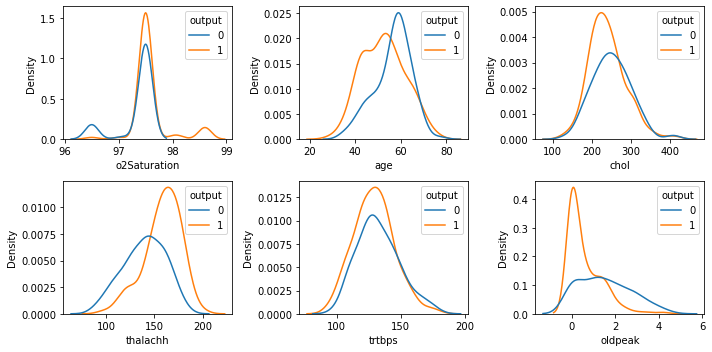

In [160]:
# select the columns to be plotted
cols = ['o2Saturation', 'age','chol','thalachh','trtbps','oldpeak' ]

# create the figure and axes
fig, axes = plt.subplots(2, 3,figsize=(10,5))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.kdeplot(data=Data_clean, x=col,hue="output",ax= ax )

fig.tight_layout()
plt.show()


### 3.3.3. Save Model<a class="NN" id="save"></a>

In [123]:
# Define the optimum model( logistic regression) using optimum parameters found from grid search
clf = svm.SVC(kernel='linear', C = 0.1, gamma = 1) 
#Train the model using the scaled training sets
clf.fit(df_train_sc, y_train)


# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(df_test_sc, y_test)
print(result)

0.8813559322033898


# 4. Questions<a class="NN" id="Questions"></a>

**a.** How you would put your model into production, including how you would test and monitor the performance of your model.

i. Think about the challenges you foresee, as well as the resources & help from your colleagues that you may need.

- The most straightforward way to monitor ML model is to constantly evaluate performance on real-world data. For exmaple, can watch this model for recall, accuracy, precision, or F1 score. 

- Asks colleague and other users to provide feedback on performance of product 

- Unit test. Check the correctness of individual model components.

- Regression test. Check whether model breaks and test for encountered bugs(need help of other colleagues) 

- Integration test. Check whether the different components work with each other within machine learning pipeline.




**b.** Say you were given 10 minutes of continuous ECG data for each of the patients in the dataset - How would that change your approach?

i. E.g. What else would you do in your EDA? Would you use a diferent model?

- look at the tiemcourse of ECG data in EDA

- look how the timecourse pattern change with other parameters such as age, sex ,output ,  etc.  

- look at the temporal aggregation of time series and its correlation with other features 


- **Modeling**:  With including ECG data, we have a mixture of time series (ECG data) and static features(other data in this project).There are two possible way for including the data

1. get an aggregation(e.g. mean) from ECG timecourse for each people and then add that as an extra feature to dataset. We need to evaluate the performance of model again with extra feature. It is better to try other model and see if there is better prediction model than current one. 

2.  Treat  static features as fixed temporal data and make a temporal dimension for each of  static features and let the model handle the rest. Probably deep learning model work better for for time series analysis. 

